In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math 

In [21]:
# READING THE DATASET
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']
df_training = pd.read_csv("task1 classifier.csv", header=None, names=cols)

In [3]:
# INITIALIZING ARRAY AND VARIABLES TO BE USED
category1 = [None] * 150
category2 = [None] * 150
theta1 = [None] * 150
theta2 = [None] * 150
theta3 = [None] * 150
theta4 = [None] * 150
theta5 = [None] * 150
theta6 = [None] * 150
theta7 = [None] * 150
theta8 = [None] * 150
bias1 = [None] * 150
bias2 = [None] * 150
target1 = [None] * 150
target2 = [None] * 150
sigmoid1 = [None] * 150
sigmoid2 = [None] * 150
prediction1 = [None] * 150
prediction2 = [None] * 150
error1 = [None] * 150
error2 = [None] * 150
dtheta1 = [None] * 150
dtheta2 = [None] * 150
dtheta3 = [None] * 150
dtheta4 = [None] * 150
dtheta5 = [None] * 150
dtheta6 = [None] * 150
dtheta7 = [None] * 150
dtheta8 = [None] * 150
dbias1 = [None] * 150
dbias2 = [None] * 150
firstepoch = 1
error1 = [0] * 100
error2 = [0] * 100
accuracy = [0] * 100
epoch = 100
learning_rate = 0.1

In [4]:
# FUNCTION TO GET THE THETA OF EVERY ITERATION
def getTheta(n):
	if n > 0:
		theta1[n] = theta1[n-1] - learning_rate * dtheta1[n-1]
		theta2[n] = theta2[n-1] - learning_rate * dtheta2[n-1]
		theta3[n] = theta3[n-1] - learning_rate * dtheta3[n-1]
		theta4[n] = theta4[n-1] - learning_rate * dtheta4[n-1]
		theta5[n] = theta5[n-1] - learning_rate * dtheta5[n-1]
		theta6[n] = theta6[n-1] - learning_rate * dtheta6[n-1]
		theta7[n] = theta7[n-1] - learning_rate * dtheta7[n-1]
		theta8[n] = theta8[n-1] - learning_rate * dtheta8[n-1]
	elif firstepoch == 0 and n < 1:
		theta1[n] = theta1[149] - learning_rate * dtheta1[149]
		theta2[n] = theta2[149] - learning_rate * dtheta2[149]
		theta3[n] = theta3[149] - learning_rate * dtheta3[149]
		theta4[n] = theta4[149] - learning_rate * dtheta4[149]
		theta5[n] = theta5[149] - learning_rate * dtheta5[149]
		theta6[n] = theta6[149] - learning_rate * dtheta6[149]
		theta7[n] = theta7[149] - learning_rate * dtheta7[149]
		theta8[n] = theta8[149] - learning_rate * dtheta8[149]
	else:
		theta1[n] = random.uniform(0, 1)
		theta2[n] = random.uniform(0, 1)
		theta3[n] = random.uniform(0, 1)
		theta4[n] = random.uniform(0, 1)
		theta5[n] = random.uniform(0, 1)
		theta6[n] = random.uniform(0, 1)
		theta7[n] = random.uniform(0, 1)
		theta8[n] = random.uniform(0, 1)

In [5]:
# FUNCTION TO GET THE BIAS OF EVERY ITERATION
def getBias(n):
	if n > 0:
		bias1[n] = bias1[n-1] - learning_rate * dbias1[n-1]
		bias2[n] = bias2[n-1] - learning_rate * dbias2[n-1]
	elif firstepoch == 0 and n < 1:
		bias1[n] = bias1[149] - learning_rate * dbias1[149]
		bias2[n] = bias2[149] - learning_rate * dbias2[149]
	else:
		bias1[n] = random.uniform(0, 1)
		bias2[n] = random.uniform(0, 1)

In [22]:
# FUNCTION TO GET THE TARGET
def getTarget(n):
    print(theta1[n])
    print(theta2[n])
    print(theta3[n])
    print(theta4[n])
    print(df_training['sepal_length'][n])
    print(df_training['sepal_width'][n])
    print(df_training['petal_length'][n])
    print(df_training['petal_width'][n])
    print(bias1[n])
    print(bias2[n])
    
    target1[n] = df_training['sepal_length'][n]*theta1[n] + df_training['sepal_width'][n]*theta2[n] + df_training['petal_length'][n]*theta3[n] + df_training['petal_width'][n]*theta4[n] + bias1[n]
    target2[n] = df_training['sepal_length'][n]*theta5[n] + df_training['sepal_width'][n]*theta6[n] + df_training['petal_length'][n]*theta7[n] + df_training['petal_width'][n]*theta8[n] + bias2[n]

In [7]:
# FUNCTION TO GET THE SIGMOID
def getSigmoid(n):
	sigmoid1[n] = 1/(1 + math.exp(-target1[n]))
	sigmoid2[n] = 1/(1 + math.exp(-target2[n]))

In [8]:
# FUNCTION TO GET THE PREDICTION
def getPrediction(n):
	if sigmoid1[n] < 0.5:
		prediction1[n] = 0
	else:
		prediction1[n] = 1

	if sigmoid2[n] < 0.5:
		prediction2[n] = 0
	else:
		prediction2[n] = 1

In [23]:
# FUNCTION TO GET THE CATEGORY
def getCategory(n):
	if df_training['category'][n] == 'Iris-setosa':
		category1[n] = 1
		category2[n] = 0
	elif df_training['category'][n] == 'Iris-versicolor':
		category1[n] = 0
		category2[n] = 1
	elif df_training['category'][n] == 'Iris-virginica':
		category1[n] = 0
		category2[n] = 0

In [10]:
# FUNCTION TO GET THE ERROR
def getError(n):
	error1[n] = abs(sigmoid1[n]-category1[n]) ** 2
	error2[n] = abs(sigmoid2[n]-category2[n]) ** 2

In [11]:
# FUNCTION TO GET THE TOTAL ERROR IN EPOCHS
def getTotalError(k, n):
	totalerror1[k] += error1[n]
	totalerror2[k] += error2[n]

In [12]:
# FUNCTION TO GET THE ACCURACY
def getAccuracy(k, n):
	if category1[n] == prediction1[n] and category2[n] == prediction2[n]:
		accuracy[k] += 1

In [13]:
# FUNCTION TO GET THE AVERAGE OF TOTAL ERROR IN EPOCHS
def averageTotalError(k, x):
	totalerror1[k] = totalerror1[k]/x
	totalerror2[k] = totalerror2[k]/x

In [14]:
# FUNCTION TO GET THE AVERAGE OF ACCURACY IN EPOCHS
def averageAccuracy(k, x):
	accuracy[k] = accuracy[k]/x

In [15]:
# FUNCTION TO GET THE DTHETA
def getDtheta(n):
	dtheta1[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['sepal_length'][n]
	dtheta2[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['sepal_width'][n]
	dtheta3[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['petal_length'][n]
	dtheta4[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['petal_width'][n]
	dtheta5[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['sepal_length'][n]
	dtheta6[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['sepal_width'][n]
	dtheta7[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['petal_length'][n]
	dtheta8[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['petal_width'][n]

In [16]:
# FUNCTION TO GET THE DBIAS
def getDbias(n):
	dbias1[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]
	dbias2[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]

In [17]:
# FUNCTION TO PLOT DATA EASILY
def plot(x, text):
	plt.plot(x)
	plt.ylabel(text)
	plt.show()

In [18]:
# THE MAIN LINEAR CLASSIFIER LOOP
for k in range(0, epoch):
	for n in range(0, 150):
		getTheta(n)
		getBias(n)
		getTarget(n)
		getSigmoid(n)
		getPrediction(n)
		getCategory(n)
		getError(n)
		getTotalError(k, n)
		getAccuracy(k, n)
		getDtheta(n)
		getDbias(n)
	firstepoch = 0
	print("EPOCH ", k + 1)
	averageTotalError(k, 150)
	averageAccuracy(k, 150)
	print("Accuracy = ", accuracy[k])
	print("Total error 1 = ", totalerror1[k])
	print("Total error 2 = ", totalerror2[k])
	print()


0.8612929873452404
0.03301815144130926
0.32119739534762604
0.25671796646019673
5.1
3.5
1.4
0.2
0.7844904756311465
0.8303267153331543
0.861302369884
0.0330245904383
0.321199970946
0.256718334403
4.9
3.0
1.4
0.2
0.7844923153445663
0.8301217513191272
0.861315492627
0.0330326247711
0.321203720302
0.256718870025
4.7
3.2
1.3
0.2
0.7844949934555133
0.8298690541781476
0.861334138639
0.033045319928
0.321208877709
0.256719663472
4.6
3.1
1.5
0.2
0.7844989606920335
0.8295390052049877
0.86135331926
0.0330582459988
0.32121513226
0.256720497412
5.0
3.6
1.4
0.2
0.7845031303922955
0.8292181406072467
0.861364156114
0.0330660485333
0.321218166579
0.256720930887
5.4
3.9
1.7
0.4
0.7845052977629896
0.828983017408886
0.861368459036
0.0330691561991
0.321219521202
0.256721249622
4.6
3.4
1.4
0.3
0.7845060946003852
0.8288624891558682
0.861387498222
0.0330832286415
0.321225315737
0.256722491308
5.0
3.4
1.5
0.2
0.7845102335540242
0.828526079073801
0.861397792906
0.0330902290262
0.321228404142
0.256722903095
4.4
2.

0.7777607606323774
0.757901790179
-0.0148658254078
0.244116321857
0.23170400038
5.5
2.5
4.0
1.3
0.7667202568565087
0.777760844851937
0.75562870542
-0.015899045753
0.242463169305
0.231166725801
5.5
2.6
4.4
1.2
0.7663069687184555
0.777760938599268
0.753464682417
-0.016922038445
0.240731950903
0.230694575328
6.1
3.0
4.6
1.4
0.7659135099907453
0.777761002864768
0.75202928078
-0.0176279736764
0.239649516882
0.230365138886
5.8
2.6
4.0
1.2
0.7656781982469573
0.7777610234949299
0.749945652584
-0.0185620139022
0.238212531919
0.229934043397
5.0
2.3
3.3
1.0
0.7653189520062605
0.7777610920546367
0.745862018162
-0.0204404857364
0.2355173332
0.229117316513
5.6
2.7
4.2
1.3
0.7645022251218424
0.7777616322625097
0.743541777143
-0.0215591733704
0.233777152436
0.228578689134
5.7
3.0
4.2
1.2
0.7640878963684908
0.7777617000218241
0.741227941972
-0.0227769813552
0.232072221258
0.22809156594
5.7
2.9
4.2
1.3
0.7636819603735718
0.7777617701537385
0.738914321526
-0.0239540864945
0.230367448297
0.227563898119
6.

0.6097728528322334
0.5705955471992611
-0.166169254363
-0.436328711771
-0.440020807483
0.0119362361693
6.3
2.7
4.9
1.8
0.6097600024093679
0.570325225237411
-0.166819435969
-0.436607361031
-0.440526504288
0.011750469996
6.7
3.3
5.7
2.1
0.6096567989797306
0.5698935282496208
-0.167001162732
-0.436696868242
-0.440681107654
0.0116935108613
7.2
3.2
6.0
1.8
0.6096296755822723
0.5697288696892375
-0.167138721005
-0.436758005252
-0.440795739547
0.0116591212932
6.2
2.8
4.8
1.8
0.6096105702666729
0.5696071423574992
-0.167785295697
-0.437050006726
-0.441296313502
0.0114714060601
6.1
3.0
4.9
1.8
0.6095062840260534
0.5692638901837712
-0.168287276027
-0.437296882298
-0.441699543603
0.0113232807168
6.4
2.8
5.6
2.1
0.6094239921686543
0.5690038656624301
-0.168595705568
-0.437431820223
-0.441969419452
0.0112220772734
7.2
3.0
5.8
1.6
0.6093758000527636
0.5686003005478588
-0.168780860222
-0.437508967995
-0.442118571812
0.0111809317949
7.4
2.8
6.1
1.9
0.6093500841286541
0.5684808222118086
-0.168944071709
-0.4

-0.685351242045
-0.100203728519
7.7
2.6
6.9
2.3
0.6498297596959365
0.5893501579418833
-0.0934549647349
-0.243582036115
-0.685367728623
-0.100209224045
6.0
2.2
5.0
1.5
0.6498273703367675
0.5887050714502662
-0.0938188315962
-0.243715453965
-0.685670951008
-0.10030019076
6.9
3.2
5.7
2.3
0.6497667258598696
0.587349584508449
-0.0938912691349
-0.243749048186
-0.685730790714
-0.100324336606
5.6
2.8
4.9
2.0
0.6497562276658575
0.5871308874838794
-0.0941732779564
-0.243890052596
-0.685977548433
-0.100425054043
7.7
2.8
6.7
2.0
0.6497058689477386
0.5864418002643742
-0.0941960440726
-0.243898331184
-0.68599735791
-0.100430967319
6.3
2.7
4.9
1.8
0.649702912309277
0.586211149610742
-0.0944980952695
-0.244027781697
-0.686232286619
-0.100517267661
6.7
3.3
5.7
2.1
0.6496549676748351
0.5857996587584261
-0.0945691468229
-0.244062777238
-0.686292733463
-0.100539537551
7.2
3.2
6.0
1.8
0.6496443629653725
0.5856494603672061
-0.0946205733239
-0.244085633461
-0.68633558888
-0.100552394177
6.2
2.8
4.8
1.8
0.6496

0.6857717334447596
0.00859726027653
-0.0706063966798
-0.870532439446
-0.188602439646
6.7
3.1
4.7
1.5
0.6943774297008362
0.6860931465165989
0.00801794245651
-0.0708744392533
-0.870938826574
-0.188732137665
6.3
2.3
4.4
1.3
0.6942909643545654
0.6862336112238622
0.00695837975221
-0.0712612637326
-0.871678838621
-0.188950777589
5.6
3.0
4.1
1.3
0.6941227797983264
0.6863397679227191
0.00559219461685
-0.0719931486265
-0.87267908131
-0.189267927709
5.5
2.5
4.0
1.3
0.6938788181670136
0.6867667481435742
0.00394668218127
-0.0727411088245
-0.873875817626
-0.189656867012
5.5
2.6
4.4
1.2
0.6935796340878155
0.687040116946505
0.00310735429708
-0.0731378820062
-0.874547279934
-0.189839993096
6.1
3.0
4.6
1.4
0.6934270290179644
0.6872487821301385
0.00253126821344
-0.0734212030309
-0.874981705505
-0.189972209574
5.8
2.6
4.0
1.2
0.6933325886763828
0.6874182211081403
0.000855912631262
-0.0741722244988
-0.876137123148
-0.190318834867
5.0
2.3
3.3
1.0
0.6930437342656631
0.6876842169866202
-0.00396791368149
-0.0

0.6336262804911117
0.184190474974
0.120008111303
-0.967703881233
-0.24543382894
6.3
3.3
4.7
1.6
0.7483070680633948
0.6632450326667823
0.178936563891
0.117256062641
-0.971623465691
-0.246768155564
4.9
2.4
3.3
1.0
0.7474731139233457
0.6736046645728394
0.15406104419
0.105072134623
-0.988376366715
-0.251844792237
6.6
2.9
4.6
1.3
0.7423964772495856
0.6795473188059329
0.150046347359
0.103308101167
-0.991174488748
-0.252635565856
5.2
2.7
3.9
1.4
0.741788189850963
0.6810742405490918
0.143658614491
0.0999913937166
-0.9959652884
-0.254355340089
5.0
2.0
3.5
1.0
0.7405597796839837
0.6834437576852336
0.132720412758
0.0956161130237
-1.00362202961
-0.256542980436
5.9
3.0
4.2
1.5
0.7383721393374955
0.6851430534264885
0.129009656029
0.0937292875678
-1.00626358525
-0.257486393164
6.0
2.2
4.0
1.0
0.7377431975188745
0.6865121622048281
0.123320318513
0.0916431971456
-1.01005647693
-0.258434616083
6.1
2.9
4.7
1.4
0.7367949745996971
0.687288351342624
0.121977097872
0.0910046168404
-1.01109141742
-0.258742896

3.9
1.1
0.7631148691637618
0.703510993522455
0.156262711329
0.206064633962
-1.17431001699
-0.330697234372
5.9
3.2
4.8
1.8
0.7624408681635032
0.7042089709230093
0.155796842009
0.205811959077
-1.17468902932
-0.330839363995
6.1
2.8
4.0
1.3
0.7623619072619217
0.7045846451690049
0.152283627563
0.204199336052
-1.1769927765
-0.331588081828
6.3
2.5
4.9
1.5
0.7617859704674094
0.7051300003708707
0.15190823505
0.204050370769
-1.17728474845
-0.331677460997
6.1
2.8
4.7
1.2
0.7617263843543263
0.7052796407119762
0.151176135072
0.203714324877
-1.17784882548
-0.331821480665
6.4
2.9
4.3
1.3
0.7616063679643706
0.7055854244051265
0.149203238423
0.202820356084
-1.17917436542
-0.332222225297
6.6
3.0
4.4
1.4
0.7612981028630962
0.7059488160229135
0.147589320778
0.202086757154
-1.18025031052
-0.332564571464
6.8
2.8
4.8
1.4
0.7610535698865735
0.7062502654556154
0.146952769184
0.201824647674
-1.18069964105
-0.332695626204
6.7
3.0
5.0
1.7
0.7609599593580341
0.7064047976472722
0.146614575544
0.201673217686
-1.1809

6.0
2.7
5.1
1.6
0.7830385866648296
0.719215862310855
0.172801331438
0.301533769853
-1.32342850097
-0.394885827464
5.4
3.0
4.5
1.5
0.7830238900807828
0.7193307354971973
0.172405919013
0.301314096283
-1.32375801133
-0.394995664249
6.0
3.4
4.5
1.6
0.7829506655576082
0.7196805511988736
0.17178338886
0.300961329196
-1.32422490894
-0.395161672289
6.7
3.1
4.7
1.5
0.7828469105321281
0.7200037419856703
0.171314058237
0.300744176222
-1.32455414087
-0.395266746309
6.3
2.3
4.4
1.3
0.7827768611854485
0.7201446911352688
0.17071026659
0.30052374435
-1.32497583662
-0.395391338237
5.6
3.0
4.1
1.3
0.782681021241402
0.7202614694182282
0.169359430316
0.299800082061
-1.32596484175
-0.395704925229
5.5
2.5
4.0
1.3
0.7824398004783037
0.7206770383429211
0.168149706829
0.299250207749
-1.32684464065
-0.395990859871
5.5
2.6
4.4
1.2
0.7822198507533491
0.7209653440852524
0.167661933239
0.29901962387
-1.32723485952
-0.3960972832
6.1
3.0
4.6
1.4
0.7821311646461343
0.7212052753330443
0.167241277702
0.298812744097
-1.3

6.5
3.0
5.8
2.2
0.7996391332077997
0.7151703071299886
0.184752904959
0.38286050724
-1.45512100283
-0.452370606842
7.6
3.0
6.6
2.1
0.7996384431580473
0.7063841002897411
0.18475206204
0.382860174508
-1.45512173484
-0.452370839754
4.9
2.5
4.5
1.7
0.7996383322476648
0.6939346581513354
0.18466584288
0.382816185141
-1.4552009157
-0.452400752524
7.3
2.9
6.3
1.8
0.7996207365007162
0.6643312482984642
0.184663743027
0.382815350953
-1.4552027279
-0.452401270296
6.7
2.5
5.8
1.8
0.7996204488496443
0.6560522124296446
0.184658881897
0.382813537098
-1.45520693605
-0.452402576271
7.2
3.6
6.1
2.5
0.7996197233078779
0.6521530190774733
0.184655644738
0.382811918519
-1.45520967864
-0.452403700285
6.5
3.2
5.1
2.0
0.7996192737024143
0.6515407447386804
0.184608337089
0.382788628599
-1.45524679695
-0.452418256485
6.4
2.7
5.3
1.9
0.799611995602508
0.6504708485998223
0.184589510227
0.382780686017
-1.45526238794
-0.452423845709
6.8
3.0
5.5
2.1
0.7996090539054167
0.6488613823932772
0.184575887718
0.382774676086
-1

-1.55488726116
-0.498195275087
7.9
3.8
6.4
2.0
0.8177913013111342
0.6465963351419394
0.219006449915
0.465031577691
-1.55488947175
-0.498195965898
6.4
2.8
5.6
2.2
0.8177909559053932
0.6465654906124878
0.219001999563
0.465029630661
-1.55489336581
-0.498197495707
6.3
2.8
5.1
1.5
0.817790260537844
0.6463052468388346
0.218962574047
0.46501210821
-1.55492528171
-0.498206882734
6.1
2.6
5.6
1.4
0.8177840025195602
0.6460246954072588
0.218955738917
0.465009194876
-1.55493155658
-0.498208451453
7.7
3.0
6.1
2.3
0.8177828820063521
0.6457135064438393
0.218953558895
0.465008345517
-1.55493328361
-0.498209102628
6.3
3.4
5.6
2.4
0.81778259888666
0.6456196840763091
0.218947570353
0.465005113605
-1.55493860676
-0.498211383977
6.4
3.1
5.5
1.8
0.817781648324404
0.6455114713467373
0.218935671594
0.464999350144
-1.55494883225
-0.498214730503
6.0
3.0
4.8
1.8
0.8177797891433043
0.6453650232355186
0.218861545467
0.46496228708
-1.55500813316
-0.498236968341
6.9
3.1
5.4
2.1
0.8177674347888315
0.6451245183716036
0

EPOCH  11
Accuracy =  0.9133333333333333
Total error 1 =  0.003921521997115499
Total error 2 =  0.07918460594323018

0.24913875167
0.536751101013
-1.64231234459
-0.538839311223
5.1
3.5
1.4
0.2
0.832951952552234
0.6559000505642
0.273988634032
0.55380494185
-1.63549080825
-0.537864806032
4.9
3.0
1.4
0.2
0.837824478505557
0.6553798869587368
0.302870331521
0.571487613782
-1.62723889468
-0.536685961236
4.7
3.2
1.3
0.2
0.8437187024828586
0.6544004835509164
0.317320428607
0.581325977756
-1.62324205932
-0.536071063488
4.6
3.1
1.5
0.2
0.846793191224622
0.6535957537262418
0.340024668603
0.596626661231
-1.6158385028
-0.535083922619
5.0
3.6
1.4
0.2
0.8517288955714707
0.6527748457278332
0.347183248536
0.601780838783
-1.61383410042
-0.534797579421
5.4
3.9
1.7
0.4
0.8531606115581458
0.6523947219668055
0.358305087457
0.609813278003
-1.61033278076
-0.533973739501
4.6
3.4
1.4
0.3
0.8552202113582179
0.6522021329745274
0.367092626133
0.616308415286
-1.60765831247
-0.533400639153
5.0
3.4
1.5
0.2
0.85713054

1.4
0.2
0.8835221043698126
0.6582997183125249
0.461933839288
0.725043611538
-1.66232166794
-0.566168884735
4.7
3.2
1.6
0.2
0.8837660076104586
0.6580264126515671
0.466101177335
0.72788094808
-1.66090299967
-0.565991551201
4.8
3.1
1.6
0.2
0.8846526752799961
0.6576433966993273
0.470314045414
0.730601758714
-1.65949871031
-0.565816015031
5.4
3.4
1.5
0.4
0.8855303561297785
0.6572359506765867
0.471924824802
0.731615953144
-1.65905127159
-0.56569669804
5.2
4.1
1.5
0.1
0.8858286486090808
0.6570159516972134
0.472417254332
0.732004214889
-1.65890922461
-0.565687228241
5.5
4.2
1.4
0.2
0.8859233465956299
0.6569237144973021
0.472692199719
0.732214173184
-1.65883923851
-0.565677230227
4.9
3.1
1.5
0.1
0.8859733366659784
0.656849487656225
0.475095062836
0.733734351891
-1.65810366817
-0.565628192204
5.0
3.2
1.2
0.2
0.8864637168938558
0.6564604801317296
0.475917932925
0.734260988748
-1.65790617935
-0.5655952774
5.5
3.5
1.3
0.2
0.8866282909117941
0.6560846452967473
0.476427435136
0.734585217428
-1.657785

0.4
0.8960663032431224
0.6649394686720179
0.494547745294
0.786101618217
-1.72688406619
-0.597589285298
4.8
3.0
1.4
0.3
0.8966204837574835
0.6648529183427349
0.496486320427
0.787313227675
-1.72631864844
-0.597468124352
5.1
3.8
1.6
0.2
0.8970243535768935
0.664456764674711
0.497275401619
0.787901170524
-1.72607109356
-0.597437179992
4.6
3.2
1.4
0.2
0.8971790753792344
0.6643546534226964
0.49871022986
0.788899311908
-1.7256344067
-0.597374796155
5.3
3.7
1.5
0.2
0.8974909945619481
0.6640318709484305
0.499255262097
0.789279806112
-1.7254801523
-0.597354228901
5.0
3.3
1.4
0.2
0.8975938308331214
0.6639216272036206
0.500149773442
0.7898701836
-1.72522968912
-0.597318448447
7.0
3.2
4.7
1.4
0.8977727331021238
0.6636923697805042
0.483151053292
0.782099340102
-1.7366431155
-0.600718192477
6.4
3.2
4.5
1.5
0.8953443445093019
0.6651642961031764
0.472177419045
0.776612522979
-1.74435895208
-0.603290138004
6.9
3.1
4.9
1.5
0.8936297141582275
0.6671855435150346
0.468574331413
0.774993744477
-1.74691766649


-0.650956147286
6.7
3.0
5.0
1.7
0.8833156301501242
0.7879297662109984
0.388766398796
0.772649968918
-1.86798823068
-0.65098701078
6.0
2.9
4.5
1.5
0.8832974751537065
0.788166973758644
0.388326062671
0.772437139791
-1.86831848278
-0.651097094811
5.7
2.6
3.5
1.0
0.8832240857994471
0.7886079870261611
0.375935174249
0.766785155598
-1.87592692304
-0.653270934885
5.5
2.4
3.8
1.1
0.8810502457254509
0.7891912534126263
0.373820150333
0.765862236071
-1.87738821229
-0.653693939669
5.5
2.4
3.7
1.0
0.8806656959225283
0.789710028631519
0.370566768883
0.764442578711
-1.87957685072
-0.654285463569
5.8
2.7
3.9
1.2
0.8800741720226625
0.7902238030998262
0.368181628638
0.763332254804
-1.88118065192
-0.654778940861
6.0
2.7
5.1
1.6
0.8796629409458382
0.7906570295392044
0.36816150969
0.763323201278
-1.88119775302
-0.654784305913
5.4
3.0
4.5
1.5
0.879659587787893
0.7909016318481494
0.367966723883
0.76321498694
-1.88136007453
-0.654838413082
6.0
3.4
4.5
1.6
0.8796235163421241
0.7914793376499702
0.367437991617
0

0.7340745210682394
0.352039691783
0.787135432354
-1.94995881814
-0.684933759581
6.7
2.5
5.8
1.8
0.8805914796860492
0.7329598346151002
0.352039123347
0.787135220251
-1.94995931022
-0.684933912295
7.2
3.6
6.1
2.5
0.8805913948448822
0.7312756687282957
0.352038539439
0.787134928296
-1.94995980492
-0.684934115041
6.5
3.2
5.1
2.0
0.8805913137465039
0.7309571621619161
0.352021877671
0.78712672558
-1.949972878
-0.684939241738
6.4
2.7
5.3
1.9
0.8805887503976235
0.7301336209470292
0.35201819979
0.787125173974
-1.94997592374
-0.68494033361
6.8
3.0
5.5
2.1
0.8805881757286208
0.7290105246301721
0.352015303296
0.787123896109
-1.94997826649
-0.684941228115
5.7
2.5
5.0
2.0
0.8805877497736038
0.7284014842432097
0.352011202995
0.787122097731
-1.94998186325
-0.684942666817
5.8
2.8
5.1
2.4
0.8805870304225937
0.7271633170967736
0.352008390421
0.787120739937
-1.94998433637
-0.684943830641
6.4
3.2
5.3
2.3
0.8805865454961476
0.7264733528758441
0.352003723457
0.787118406455
-1.9499882012
-0.684945507831
6.5
3.

0.822274735182
-1.99401588651
-0.706183112425
7.2
3.2
6.0
1.8
0.8867018743214097
0.7327979231063131
0.365535626499
0.822274287668
-1.9940167256
-0.706183364152
6.2
2.8
4.8
1.8
0.886701734473295
0.7326704741313862
0.365510018954
0.82226272297
-1.9940365508
-0.7061907986
6.1
3.0
4.9
1.8
0.8866976042240416
0.7322124421334739
0.365488174183
0.82225197964
-1.99405409824
-0.706197244598
6.4
2.8
5.6
2.1
0.8866940231140187
0.7318943926621784
0.365487341612
0.822251615391
-1.99405482674
-0.706197517786
7.2
3.0
5.8
1.6
0.8866938930248799
0.731670572622466
0.365485212833
0.822250728399
-1.99405654159
-0.706197990848
7.4
2.8
6.1
1.9
0.8866935973610651
0.7315105831456218
0.365484851444
0.822250591657
-1.99405683949
-0.706198083637
7.9
3.8
6.4
2.0
0.8866935485247108
0.7313601386470328
0.365484096195
0.822250228373
-1.99405745134
-0.706198274839
6.4
2.8
5.6
2.2
0.8866934529235735
0.7313267159831872
0.365483373246
0.822249912083
-1.99405808392
-0.706198523353
6.3
2.8
5.1
1.5
0.8866933399628275
0.73112

Accuracy =  0.9
Total error 1 =  0.0018376378589673769
Total error 2 =  0.09035707793768757

0.377433179968
0.85404358122
-2.03418038416
-0.725621482233
5.1
3.5
1.4
0.2
0.8921310506258154
0.7391827389011012
0.380517361053
0.856160176082
-2.03333374621
-0.725500533955
4.9
3.0
1.4
0.2
0.892735792014982
0.7373535092142193
0.387490713756
0.860429575697
-2.03134135973
-0.725215907314
4.7
3.2
1.3
0.2
0.8941589252198315
0.7345459191985201
0.391093101431
0.862882265178
-2.03034495462
-0.725062614222
4.6
3.1
1.5
0.2
0.8949253906826349
0.73248344166085
0.399642548637
0.868643849164
-2.0275570914
-0.724690899126
5.0
3.6
1.4
0.2
0.8967839661620561
0.7306873871212138
0.401636646875
0.870079599896
-2.0269987439
-0.724611135196
5.4
3.9
1.7
0.4
0.8971827858097196
0.7297643115474656
0.405481808046
0.872856660742
-2.0257882302
-0.724326308443
4.6
3.4
1.4
0.3
0.8978948526932969
0.7293310081982368
0.409042971854
0.875488825295
-2.02470439773
-0.724094058629
5.0
3.4
1.5
0.2
0.8986690187385034
0.72824549109

4.7
3.2
1.3
0.2
0.898749314534689
0.7454768567610169
0.399804567178
0.890538474288
-2.0675803966
-0.742964393556
4.6
3.1
1.5
0.2
0.8994052019722311
0.7433230069035452
0.407381469819
0.895644647807
-2.06510966748
-0.742634963006
5.0
3.6
1.4
0.2
0.9010523547203984
0.741464444466229
0.409085940876
0.896871866968
-2.06463241559
-0.742566784164
5.4
3.9
1.7
0.4
0.9013932489317057
0.7405108853542807
0.412423164696
0.899282084171
-2.06358180809
-0.7423195824
4.6
3.4
1.4
0.3
0.9020112533428015
0.7400679585030747
0.415573647385
0.901610701811
-2.06262296553
-0.742114116137
5.0
3.4
1.5
0.2
0.902696140883911
0.7389604247246845
0.418650546091
0.903702992931
-2.06169989592
-0.741991040189
4.4
2.9
1.4
0.2
0.9033115206251515
0.7380119760968025
0.424941177085
0.907849090631
-2.05969833151
-0.741705102417
4.9
3.1
1.5
0.1
0.9047412094873317
0.7361395932549754
0.429017280198
0.910427849744
-2.05845054484
-0.741621916639
5.4
3.7
1.5
0.2
0.9055730672655953
0.7349433235780086
0.43020503053
0.911241678675
-2.

0.9123199351202198
0.7395932913657142
0.451918218145
0.945965502185
-2.08824944734
-0.757518896967
4.6
3.6
1.0
0.2
0.912577790536509
0.7393030765542674
0.452133357673
0.946133872251
-2.08820267788
-0.757509543075
5.1
3.3
1.7
0.5
0.9126245599992748
0.738733233660021
0.458467437851
0.950232394719
-2.08609131782
-0.756888554822
4.8
3.4
1.9
0.2
0.9138665365046615
0.7383406250185154
0.466633150129
0.956016440915
-2.08285905671
-0.75654831681
5.0
3.0
1.6
0.2
0.9155677265625627
0.7380192159617098
0.470827524071
0.958533065281
-2.08151685705
-0.756380541853
5.0
3.4
1.6
0.4
0.9164066013509584
0.737334472745874
0.473421976997
0.96029729327
-2.08068663211
-0.756172985619
5.2
3.5
1.5
0.2
0.9169254919361773
0.7369841206516563
0.474344935835
0.960918515565
-2.08042039399
-0.756137487202
5.2
3.4
1.4
0.2
0.9171029840205036
0.7366537124569483
0.475079156266
0.96139858277
-2.08022271926
-0.756109247954
4.7
3.2
1.6
0.2
0.9172441802572009
0.7362495938174346
0.478286397194
0.963582236168
-2.07913089256
-0.

6.7
3.1
4.4
1.4
0.9190938074274528
0.8526100776819627
0.467384972945
0.981404927532
-2.13091964448
-0.778620881159
5.6
3.0
4.5
1.5
0.9188745689511232
0.8536811292020039
0.467177664341
0.981293869351
-2.13108623175
-0.77867641025
5.8
2.7
4.1
1.0
0.918837549557553
0.8559590758131036
0.465586634226
0.980553217401
-2.13221092546
-0.778950725787
6.2
2.2
4.5
1.5
0.9185632340205513
0.8570615981145091
0.465504845324
0.980524195533
-2.13227028837
-0.778970513424
5.6
2.5
3.9
1.1
0.918550042262171
0.8574962188199686
0.463841735836
0.97978173594
-2.13342852533
-0.779297195645
5.9
3.2
4.8
1.8
0.9182530584249433
0.8584462061911144
0.463771507041
0.979743645746
-2.13348566062
-0.779318621379
6.1
2.8
4.0
1.3
0.9182411552394333
0.8596950851549606
0.461418676278
0.978663657855
-2.13502850047
-0.779820044329
6.3
2.5
4.9
1.5
0.9178554452782953
0.8602968149757014
0.46139121666
0.978652761181
-2.13504985795
-0.779826582333
6.1
2.8
4.7
1.2
0.9178510866086818
0.8606428770871879
0.461244979612
0.978585635978
-

0.999888034282
-2.16167292575
-0.792970632603
5.9
3.2
4.8
1.8
0.9213407291980397
0.8690028748115941
0.469239810545
0.999854241759
-2.16172361454
-0.792989640897
6.1
2.8
4.0
1.3
0.9213301690344653
0.8702899080273704
0.46704804286
0.998848184461
-2.16316083925
-0.793456738928
6.3
2.5
4.9
1.5
0.920970862856563
0.8708823817973075
0.467024112869
0.998838688432
-2.16317945146
-0.793462436545
6.1
2.8
4.7
1.2
0.9209670644453092
0.8712237471521916
0.466892767028
0.998778398538
-2.16328065236
-0.793488275071
6.4
2.9
4.3
1.3
0.9209455323402334
0.8717483854916914
0.4658811461
0.998320007805
-2.16396033517
-0.793693760572
6.6
3.0
4.4
1.4
0.9207874665702918
0.8721439353071665
0.465042750688
0.997938918982
-2.16451926544
-0.793871602024
6.8
2.8
4.8
1.4
0.9206604369623306
0.8724785893785542
0.464915541712
0.997886538815
-2.16460906002
-0.793897792107
6.7
3.0
5.0
1.7
0.9206417297599581
0.8726891829748845
0.464870668268
0.997866446228
-2.16464254766
-0.793909177906
6.0
2.9
4.5
1.5
0.920635032231099
0.87

0.9157010413320423
0.8149256471429104
0.428221369658
0.996862725794
-2.21729603495
-0.815217075047
5.8
2.8
5.1
2.4
0.9157008255328407
0.8138143486996819
0.428220540106
0.996862325321
-2.21729676439
-0.81521741831
6.4
3.2
5.3
2.3
0.9157006825066021
0.8132716926504104
0.428218894411
0.996861502473
-2.21729812723
-0.815218009732
6.5
3.0
5.5
1.8
0.915700425366846
0.8129648630575381
0.428217756248
0.996860977167
-2.21729909029
-0.815218324915
7.7
3.8
6.7
2.2
0.9157002502647008
0.8125583149579975
0.428217708884
0.996860953793
-2.2172991315
-0.815218338448
7.7
2.6
6.9
2.3
0.9157002441136025
0.81250034303449
0.428217707368
0.996860953281
-2.21729913286
-0.815218338901
6.0
2.2
5.0
1.5
0.9157002439167634
0.8122457250001659
0.42821562931
0.996860191326
-2.21730086457
-0.815218858415
6.9
3.2
5.7
2.3
0.9156998975737316
0.8107733556777923
0.428215166621
0.996859976746
-2.21730124679
-0.815219012645
5.6
2.8
4.9
2.0
0.9156998305173414
0.8106020506899161
0.428212029808
0.996858408339
-2.21730399151
-0.

-2.24118494948
-0.827016483444
7.7
2.6
6.9
2.3
0.9186105495977861
0.8227451952278663
0.434264822636
1.01508161041
-2.24118495061
-0.827016483818
6.0
2.2
5.0
1.5
0.9186105494350397
0.8224825108314072
0.434262971203
1.01508093156
-2.24118649347
-0.827016946677
6.9
3.2
5.7
2.3
0.9186102408627855
0.8209681794793291
0.434262561072
1.01508074135
-2.24118683227
-0.827017083387
5.6
2.8
4.9
2.0
0.918610181423521
0.8207982455069597
0.434259738121
1.01507932987
-2.24118930235
-0.827018091584
7.7
2.8
6.7
2.0
0.9186096773251463
0.820360302111649
0.434259730552
1.01507932712
-2.24118930894
-0.82701809355
6.3
2.7
4.9
1.8
0.9186096763421283
0.8201905116384374
0.434253116918
1.01507649271
-2.24119445288
-0.82701998316
6.7
3.3
5.7
2.1
0.9186086265589438
0.8195917921575725
0.434252546374
1.01507621169
-2.24119493827
-0.827020161987
7.2
3.2
6.0
1.8
0.9186085414031648
0.8194717794049123
0.434252215479
1.01507606463
-2.24119521401
-0.82702024471
6.2
2.8
4.8
1.8
0.9186084954455842
0.8193355446463981
0.434240

1.4
0.2
0.9213132381192056
0.8250290706870512
0.440739665519
1.03280846227
-2.26351192468
-0.838154773503
4.9
3.0
1.4
0.2
0.9215003495612933
0.8226072028049405
0.443545487201
1.03452631228
-2.26271026134
-0.838040250169
4.7
3.2
1.3
0.2
0.9220729662312567
0.8188280410520391
0.444909986519
1.03545533309
-2.26233284664
-0.837982186368
4.6
3.1
1.5
0.2
0.922363285234937
0.8163702882743512
0.448875216782
1.03812755348
-2.26103983677
-0.837809785052
5.0
3.6
1.4
0.2
0.9232252918138129
0.8143106201506272
0.449602034597
1.03865086231
-2.26083632778
-0.83778071234
5.4
3.9
1.7
0.4
0.9233706553768074
0.8132933503559611
0.451125101686
1.03975085521
-2.2603568437
-0.837667892555
4.6
3.4
1.4
0.3
0.9236527048377682
0.8128480014485487
0.452706248444
1.0409195289
-2.25987562512
-0.837564774289
5.0
3.4
1.5
0.2
0.9239964323938094
0.8117222123418929
0.454267647732
1.04198128041
-2.25940720533
-0.837502318317
4.4
2.9
1.4
0.2
0.9243087122515081
0.8106789846486985
0.458085098331
1.0444973274
-2.25819256196
-0.

1.5
0.4
0.9289846067324155
0.8123629627197787
0.469535195501
1.06475563683
-2.27761000547
-0.847745279453
5.4
3.9
1.3
0.4
0.9290069594633377
0.8122624366367601
0.469719873354
1.06488901528
-2.27756554599
-0.847731599612
5.1
3.5
1.4
0.3
0.9290411590658469
0.811987311458835
0.470410442729
1.06536293544
-2.27737597792
-0.847690977884
5.7
3.8
1.7
0.3
0.9291765648255117
0.8114983894767693
0.471302963741
1.06595794945
-2.27710978745
-0.847644003094
5.1
3.8
1.5
0.3
0.9293331474592406
0.8112769512322519
0.471867331264
1.06637845859
-2.276943797
-0.847610805004
5.4
3.4
1.7
0.2
0.929443807757948
0.8110206523794321
0.473925596885
1.06767440361
-2.27629582449
-0.847534572944
5.1
3.7
1.5
0.4
0.9298249680580473
0.8105931877831098
0.474707917697
1.06824196969
-2.27606573013
-0.847473214449
4.6
3.6
1.0
0.2
0.9299783642957505
0.8103197823796541
0.474814823137
1.06832563481
-2.27604248982
-0.847468566386
5.1
3.3
1.7
0.5
0.9300016046087781
0.8097763315775599
0.479485178286
1.07134762932
-2.27448570477
-0

-0.855374232511
5.3
3.7
1.5
0.2
0.9399220501233947
0.8084528771932583
0.516446480141
1.10745201593
-2.28418318294
-0.855365205448
5.0
3.3
1.4
0.2
0.9399671854364454
0.8083318968712958
0.516907724756
1.10775643738
-2.28405403445
-0.855346755664
7.0
3.2
4.7
1.4
0.9400594343594925
0.8080557254954991
0.516288235154
1.10747324213
-2.28446997746
-0.855470653584
6.4
3.2
4.5
1.5
0.9399709358448128
0.8090998996326471
0.515659337974
1.10715879354
-2.28491217079
-0.855618051361
6.9
3.1
4.9
1.5
0.9398726706605097
0.8103467428398801
0.515509841219
1.10709162833
-2.28501833516
-0.855650550655
5.5
2.3
4.0
1.3
0.9398510044641141
0.8115626893880711
0.515110182986
1.10692449852
-2.28530899569
-0.855745015329
6.5
2.8
4.6
1.5
0.9397783393308289
0.8160723600252583
0.51492445761
1.10684449375
-2.28544043211
-0.855787875031
5.7
2.8
4.5
1.3
0.9397497661959918
0.8187785315392081
0.514766122388
1.10676671504
-2.2855654336
-0.855823986573
6.3
3.3
4.7
1.6
0.939721988086979
0.8222772788278926
0.514532796331
1.1066

6.1
2.9
4.7
1.4
0.9392193381461351
0.9260852802993496
0.505386283228
1.11400056056
-2.3131862844
-0.86781948673
5.6
2.9
3.6
1.3
0.9392069650858571
0.9292849197030127
0.498944616043
1.11066469719
-2.31732735617
-0.869314873755
6.7
3.1
4.4
1.4
0.9380566673742047
0.9323375411998884
0.498167446694
1.11030511138
-2.31783773604
-0.86947726735
5.6
3.0
4.5
1.5
0.937940671948951
0.933358034847035
0.49807288684
1.11025445431
-2.31791372163
-0.869502595883
5.8
2.7
4.1
1.0
0.9379237862606782
0.9360164613280059
0.49719121842
1.10984402246
-2.31853697
-0.869654607679
6.2
2.2
4.5
1.5
0.9377717744641866
0.9370150199507321
0.497159288212
1.10983269239
-2.31856014515
-0.869662332729
5.6
2.5
3.9
1.1
0.9377666244306094
0.9373693112280463
0.496229768122
1.10941772806
-2.3192074895
-0.869844917033
5.9
3.2
4.8
1.8
0.937600638700201
0.9382325996443917
0.496199774772
1.10940146048
-2.31923189087
-0.869854067546
6.1
2.8
4.0
1.3
0.9375955550816649
0.9397757695461183
0.49481182467
1.10876436863
-2.32014202208
-0.

1.6
0.9370651620648741
0.9554074689949351
0.485359909272
1.11565374312
-2.34628945578
-0.881426282359
6.7
3.1
4.7
1.5
0.9370314093892671
0.9560648660912114
0.485252503169
1.11560404776
-2.34636480036
-0.881450328501
6.3
2.3
4.4
1.3
0.9370153786276614
0.9562272629218206
0.485185496412
1.11557958497
-2.34641159873
-0.881464155292
5.6
3.0
4.1
1.3
0.9370047426345203
0.956324551511421
0.484624710235
1.11527916381
-2.34682217433
-0.881594337798
5.5
2.5
4.0
1.3
0.9369046022456026
0.9568990278044771
0.484360190671
1.11515892764
-2.34701455219
-0.881656860604
5.5
2.6
4.4
1.2
0.9368565077795503
0.9572383899201385
0.484298691931
1.11512985551
-2.34706375118
-0.88167027851
6.1
3.0
4.6
1.4
0.9368453261904411
0.9576029871298818
0.484217168896
1.11508976221
-2.34712522757
-0.881688988715
5.8
2.6
4.0
1.2
0.9368319617585047
0.9578645941974675
0.483676025822
1.11484718084
-2.34749842969
-0.881800949351
5.0
2.3
3.3
1.0
0.9367386612283655
0.9580889732523329
0.480022060528
1.1131663568
-2.34991004678
-0.88

0.9426712934356904
0.9437535529696357
0.510031821822
1.13796392371
-2.34948111261
-0.885614678773
6.1
2.9
4.7
1.4
0.9425723116496195
0.9451693733066056
0.50996929417
1.13793419745
-2.34952928965
-0.885629029382
5.6
2.9
3.6
1.3
0.9425620612148151
0.9483832875239685
0.50413059498
1.13491058537
-2.35328273913
-0.886984441694
6.7
3.1
4.4
1.4
0.94151943635947
0.9514511548784588
0.503451040057
1.13459616443
-2.353729014
-0.887126438245
5.6
3.0
4.5
1.5
0.9414180102515924
0.9524558566429657
0.503370615186
1.13455307968
-2.35379364113
-0.887147980621
5.8
2.7
4.1
1.0
0.9414036486675196
0.9551914510486118
0.502592234946
1.13419073026
-2.35434387544
-0.887282184111
6.2
2.2
4.5
1.5
0.9412694451777541
0.9561652958941742
0.502565899581
1.13418138545
-2.35436298982
-0.88728855557
5.6
2.5
3.9
1.1
0.9412651975382866
0.956500339011141
0.501744181901
1.1338145472
-2.35493525749
-0.8874499644
5.9
3.2
4.8
1.8
0.9411184622382671
0.9573421657107252
0.501719049733
1.13380091619
-2.354955704
-0.887457631841
6.1

3.2
5.1
2.0
0.9363667351705521
0.905329268450744
0.469990011166
1.128937383
-2.39315292148
-0.902739438376
6.4
2.7
5.3
1.9
0.9363661929596919
0.9046347056447055
0.469989539939
1.12893718421
-2.39315331172
-0.902739578271
6.8
3.0
5.5
2.1
0.9363661193304592
0.9034518167551507
0.469989155735
1.1289370147
-2.39315362247
-0.902739696923
5.7
2.5
5.0
2.0
0.9363660628297622
0.9028674204931482
0.469988670257
1.12893680177
-2.39315404833
-0.902739867266
5.8
2.8
5.1
2.4
0.9363659776582108
0.9017903727138898
0.469988348618
1.1289366465
-2.39315433115
-0.902740000358
6.4
3.2
5.3
2.3
0.9363659222032403
0.9013288612744005
0.469987641193
1.12893629279
-2.39315491699
-0.902740254588
6.5
3.0
5.5
1.8
0.9363658116681166
0.9010639525646815
0.469987165186
1.12893607309
-2.39315531976
-0.902740386406
7.7
3.8
6.7
2.2
0.9363657384362104
0.900657212059564
0.469987148661
1.12893606494
-2.39315533414
-0.902740391127
7.7
2.6
6.9
2.3
0.9363657362901665
0.9006065471305628
0.469987148309
1.12893606482
-2.39315533446


2.8
6.7
2.0
0.9381005637713432
0.907446294860397
0.473369192526
1.14030425172
-2.40858523865
-0.910495002171
6.3
2.7
4.9
1.8
0.9381005634852727
0.907249060088583
0.473366008252
1.14030288703
-2.40858771531
-0.910495911964
6.7
3.3
5.7
2.1
0.9381000580450696
0.9066268142672944
0.473365768888
1.14030276913
-2.40858791895
-0.910495986988
7.2
3.2
6.0
1.8
0.9381000223190114
0.9065257295996441
0.473365635033
1.14030270964
-2.40858803049
-0.910496020452
6.2
2.8
4.8
1.8
0.9381000037280177
0.9063907229652164
0.473359848545
1.14030009639
-2.40859251035
-0.9104977004
6.1
3.0
4.9
1.8
0.9380990704235034
0.905906935234606
0.473354799312
1.14029761316
-2.4085965663
-0.910499190338
6.4
2.8
5.6
2.1
0.9380982426803791
0.9056266091762455
0.473354710212
1.14029757418
-2.40859664426
-0.910499219574
7.2
3.0
5.8
1.6
0.9380982287584864
0.9054279231860977
0.473354390485
1.14029744096
-2.40859690182
-0.910499290624
7.4
2.8
6.1
1.9
0.9380981843520331
0.9052147305899639
0.473354356102
1.14029742795
-2.40859693016


2.9
1.4
0.2
0.9414189757024233
0.8970755776912634
0.487052647529
1.15826415225
-2.42023637897
-0.917480472078
4.9
3.1
1.5
0.1
0.9419792093776413
0.8949363216546066
0.488505078946
1.15918303743
-2.4197917571
-0.917450830621
5.4
3.7
1.5
0.2
0.9422756239526694
0.8934511950644264
0.488812727183
1.15939383345
-2.41970629926
-0.917439436242
4.8
3.4
1.6
0.2
0.9423325958483861
0.8929641374833763
0.490294230821
1.16044323186
-2.41921246471
-0.917377706924
4.8
3.0
1.4
0.1
0.9426412424396747
0.8923273646727625
0.491468499761
1.16117714994
-2.41886996961
-0.917353242987
4.3
3.0
1.1
0.1
0.9428858818021382
0.8907314168467309
0.491881312036
1.16146515851
-2.41876436647
-0.917343642702
5.8
4.0
1.2
0.2
0.9429818846566952
0.8890282355442775
0.491906801496
1.16148273745
-2.41875909279
-0.917342763755
5.7
4.4
1.5
0.4
0.9429862793912165
0.8887378245696842
0.49197340941
1.16153415408
-2.41874156439
-0.917338089515
5.4
3.9
1.3
0.4
0.9429979649901534
0.888655290425202
0.492075548201
1.16160792099
-2.418716975

-2.42270952058
-0.92276397111
6.9
3.1
4.9
1.5
0.9512689844747222
0.8861759629350339
0.527500829505
1.19325554385
-2.42275627563
-0.92277828388
5.5
2.3
4.0
1.3
0.9512594426280385
0.8874064656469992
0.527303896795
1.19317319018
-2.42289949942
-0.922824831612
6.5
2.8
4.6
1.5
0.9512236366809339
0.8920949221134935
0.527219667063
1.1931369066
-2.42295910816
-0.922844269242
5.7
2.8
4.5
1.3
0.9512106782605401
0.8949105052433614
0.527145199842
1.19310032621
-2.42301789807
-0.922861252995
6.3
3.3
4.7
1.6
0.9511976138357601
0.8983723552856853
0.527034415315
1.19304229622
-2.42310054684
-0.922889388747
4.9
2.4
3.3
1.0
0.9511800289902906
0.9007266784306908
0.522023916247
1.19058817423
-2.42647496458
-0.923911939577
6.6
2.9
4.6
1.3
0.9501574781600511
0.9120382382777217
0.521870802701
1.19052089706
-2.42658168008
-0.923942098306
5.2
2.7
3.9
1.4
0.9501342791379268
0.9207722158699773
0.521452792053
1.19030385307
-2.42689518807
-0.924054639634
5.0
2.0
3.5
1.0
0.9500538924749399
0.936318762924894
0.52058

1.6
0.9524006488181166
0.9078167105565016
0.52842770357
1.20208344592
-2.43733405918
-0.929912151222
4.9
2.4
3.3
1.0
0.9523843470269663
0.9101611569518839
0.523628939177
1.1997330307
-2.4405658801
-0.930891490894
6.6
2.9
4.6
1.3
0.951405007354908
0.9215085868198235
0.523486166703
1.19967029734
-2.44066538819
-0.930919612746
5.2
2.7
3.9
1.4
0.9513833751617482
0.9303153736332022
0.523092053471
1.19946566163
-2.44096097311
-0.931025720154
5.0
2.0
3.5
1.0
0.9513075841556867
0.9459012121891909
0.522271777895
1.1991375514
-2.44153516602
-0.931189775269
5.9
3.0
4.2
1.5
0.9511435290405086
0.9754313074222264
0.521912115509
1.19895467222
-2.44179119687
-0.931281214859
6.0
2.2
4.0
1.0
0.951082569314035
1.0008836328314847
0.521514370187
1.19880883227
-2.44205636042
-0.931347505746
6.1
2.9
4.7
1.4
0.9510162784270895
1.0020256680576538
0.521475822392
1.19879050626
-2.44208606118
-0.931356352781
5.6
2.9
3.6
1.3
0.9510099591164628
1.005207994165572
0.516957409398
1.19645061382
-2.44499075524
-0.932405

2.3
3.3
1.0
0.9492555902062426
1.0338898847345015
0.50319192754
1.1982648616
-2.46863444887
-0.942109168105
5.6
2.7
4.2
1.3
0.948683218672277
1.0342811411131934
0.503080173378
1.19821098013
-2.46871826449
-0.942135111035
5.7
3.0
4.2
1.2
0.948663262571879
1.0345944760624137
0.502775267626
1.19805050342
-2.46894293189
-0.94219930172
5.7
2.9
4.2
1.3
0.9486097703346952
1.034984763493133
0.502575921115
1.19794908151
-2.46908981879
-0.942244766714
6.2
2.9
4.3
1.3
0.9485747972625977
1.0353170452762994
0.502358135016
1.19784721382
-2.46924086399
-0.942290431541
5.1
2.5
3.0
1.1
0.948539670472528
1.0354640602870044
0.488256783257
1.19093478648
-2.47753577679
-0.945331899567
5.7
2.8
4.1
1.3
0.9457746995393547
1.035856831963022
0.488064245945
1.19084020675
-2.47767426854
-0.945375811586
6.3
3.3
6.0
2.5
0.9457409210635155
1.0361168574223996
0.488064234968
1.190840201
-2.47767427899
-0.945375815942
5.8
2.7
5.1
1.9
0.9457409193212011
1.0285942407620559
0.488063836039
1.19084001529
-2.47767462978
-0.9

2.2
0.9470961812817602
0.9838111633758417
0.490634302339
1.19988503157
-2.49013170161
-0.95169244336
7.6
3.0
6.6
2.1
0.9470961767452827
0.9806012680840662
0.490634300054
1.19988503067
-2.49013170359
-0.951692443991
4.9
2.5
4.5
1.7
0.9470961764446876
0.9779157394831829
0.49063197075
1.19988384225
-2.49013384275
-0.951693252117
7.3
2.9
6.3
1.8
0.9470957010764786
0.9748696721916995
0.490631960611
1.19988383822
-2.4901338515
-0.951693254617
6.7
2.5
5.8
1.8
0.9470956996875395
0.9733784048042319
0.490631936757
1.19988382932
-2.49013387215
-0.951693261026
7.2
3.6
6.1
2.5
0.9470956961271922
0.9711587102181606
0.49063190202
1.19988381196
-2.49013390158
-0.951693273087
6.5
3.2
5.1
2.0
0.9470956913026435
0.9710065499960945
0.490629632815
1.19988269481
-2.49013568203
-0.951693971304
6.4
2.7
5.3
1.9
0.9470953421941564
0.9703990802568337
0.490629359539
1.19988257952
-2.49013590834
-0.951694052433
6.8
3.0
5.5
2.1
0.9470952994948648
0.9692405083512898
0.490629136584
1.19988248116
-2.49013608867
-0.951

1.0222848408894338
0.493104348893
1.20863086219
-2.50220094746
-0.957820433832
6.5
3.0
5.8
2.2
0.948403465849358
0.9927327380123481
0.493104321666
1.20863084962
-2.50220097176
-0.957820443048
7.6
3.0
6.6
2.1
0.9484034616606118
0.9897526819260539
0.493104319583
1.2086308488
-2.50220097357
-0.957820443623
4.9
2.5
4.5
1.7
0.9484034613865507
0.9871461634089093
0.493102123237
1.20862972822
-2.50220299062
-0.957821205621
7.3
2.9
6.3
1.8
0.9484030131526242
0.9841772573753818
0.493102113921
1.20862972452
-2.50220299866
-0.957821207918
6.7
2.5
5.8
1.8
0.9484030118765049
0.9826894562362556
0.493102091958
1.20862971632
-2.50220301767
-0.957821213818
7.2
3.6
6.1
2.5
0.9484030085984323
0.9804635261096949
0.493102059786
1.20862970023
-2.50220304493
-0.957821224989
6.5
3.2
5.1
2.0
0.9484030041301383
0.9803167204467917
0.493099915892
1.20862864478
-2.50220472706
-0.957821884649
6.4
2.7
5.3
1.9
0.9484026743001617
0.9797217482717512
0.493099661017
1.20862853725
-2.50220493813
-0.957821960315
6.8
3.0
5.5

2.9
5.6
1.8
0.9496659228906346
1.0312667998930372
0.495480988019
1.21709634083
-2.51390603584
-0.963771175423
6.5
3.0
5.8
2.2
0.9496659081700992
1.0016650573460117
0.495480962828
1.21709632921
-2.51390605832
-0.963771183949
7.6
3.0
6.6
2.1
0.9496659042946183
0.9988904284217267
0.495480960924
1.21709632846
-2.51390605997
-0.963771184475
4.9
2.5
4.5
1.7
0.9496659040441584
0.9963611655393146
0.495478886907
1.21709527028
-2.51390796468
-0.963771904032
7.3
2.9
6.3
1.8
0.949665480775305
0.9934681947120948
0.49547887833
1.21709526688
-2.51390797209
-0.963771906147
6.7
2.5
5.8
1.8
0.9496654796003215
0.9919847862773425
0.495478858065
1.21709525932
-2.51390798963
-0.963771911591
7.2
3.6
6.1
2.5
0.9496654765757426
0.9897535623771984
0.495478828213
1.21709524439
-2.51390801492
-0.963771921956
6.5
3.2
5.1
2.0
0.9496654724296296
0.989611943241546
0.495476800033
1.2170942459
-2.51390960626
-0.963772546012
6.4
2.7
5.3
1.9
0.9496651604019483
0.9890293256243543
0.495476561908
1.21709414544
-2.5139098034

2.3
0.9508822525301882
0.9868423625129864
0.497744915814
1.22528652808
-2.52528927068
-0.969562738629
5.9
3.0
5.1
1.8
0.9508822084916952
0.9868137251923563
EPOCH  43
Accuracy =  0.8933333333333333
Total error 1 =  0.0005453954500064912
Total error 2 =  0.09074493763368209

0.497744049104
1.22528608738
-2.52529001987
-0.969563003049
5.1
3.5
1.4
0.2
0.9508820615917366
0.9867074214765187
0.498038850917
1.22548840235
-2.52520909388
-0.969551442193
4.9
3.0
1.4
0.2
0.950939865868862
0.9843484746755833
0.49915039771
1.2261689412
-2.52489150908
-0.969506072936
4.7
3.2
1.3
0.2
0.9511667121530041
0.9799462588081358
0.49964030749
1.2265024968
-2.52475600212
-0.969485225712
4.6
3.1
1.5
0.2
0.9512709482765991
0.9775544750138135
0.501368124316
1.22766689509
-2.52419258359
-0.969410103241
5.0
3.6
1.4
0.2
0.9516465606298972
0.9755511547592147
0.50160509327
1.22783751274
-2.52412623228
-0.969400624483
5.4
3.9
1.7
0.4
0.951693954420682
0.9746738561576305
0.502140916854
1.22822449644
-2.52395754708
-0.96

Total error 2 =  0.09058014872986785

0.499954344027
1.23324175256
-2.53632798854
-0.975188588374
5.1
3.5
1.4
0.2
0.9520635545227758
0.9960261364189389
0.500235825996
1.23343492646
-2.53625071898
-0.975177549865
4.9
3.0
1.4
0.2
0.9521187470656904
0.9936787195129786
0.501307592362
1.23409110995
-2.53594450002
-0.975133804299
4.7
3.2
1.3
0.2
0.9523374748955019
0.9892504206677403
0.501777878206
1.23441130456
-2.53581442095
-0.975113792135
4.6
3.1
1.5
0.2
0.9524375357133734
0.9868672461290836
0.503449174527
1.23553761295
-2.53526943302
-0.975041127078
5.0
3.6
1.4
0.2
0.9528008610006075
0.9848703953483284
0.503675614248
1.23570064955
-2.5352060299
-0.975032069489
5.4
3.9
1.7
0.4
0.9528461489447477
0.9840019833195354
0.504189215981
1.23607158414
-2.53504434047
-0.974994024916
4.6
3.4
1.4
0.3
0.952941260376837
0.9836610190234564
0.504783455328
1.23651080452
-2.53486348501
-0.974955270176
5.0
3.4
1.5
0.2
0.9530704428435497
0.9827333562532957
0.505369494475
1.23690931114
-2.53468767327
-0.97493

Total error 1 =  0.0005162788552792023
Total error 2 =  0.09042066506257658

0.502088942616
1.24096435589
-2.54706083844
-0.980665123839
5.1
3.5
1.4
0.2
0.9532081826545754
1.0053311380634353
0.502358109234
1.24114907808
-2.54698694957
-0.980654568286
4.9
3.0
1.4
0.2
0.9532609604227253
1.0029951218138813
0.503392744368
1.24178252816
-2.54669133953
-0.98061233828
4.7
3.2
1.3
0.2
0.9534721104501185
0.9985408098058024
0.50384477747
1.24209029538
-2.5465663091
-0.980593102829
4.6
3.1
1.5
0.2
0.9535682877058788
0.9961661669701762
0.505463104962
1.24318090738
-2.54603859361
-0.980522740764
5.0
3.6
1.4
0.2
0.9539200980301116
0.9941757315505059
0.505679786616
1.24333691817
-2.54597792275
-0.980514073498
5.4
3.9
1.7
0.4
0.9539634343609243
0.9933160693736975
0.506172735134
1.24369293655
-2.54582273525
-0.980477558793
4.6
3.4
1.4
0.3
0.9540547211235145
0.9929804560698761
0.506745191757
1.24411605666
-2.54564850932
-0.980440224666
5.0
3.4
1.5
0.2
0.9541791682155647
0.9920634867490163
0.507309615609

1.26599071534
-2.54897253497
-0.984710461445
4.9
3.1
1.5
0.1
0.9597061479344374
0.9836843447720859
0.531192336574
1.26645025376
-2.54875017767
-0.984695637625
4.4
3.0
1.3
0.2
0.9598543861350848
0.9830851366792287
0.531814633987
1.26687454745
-2.54856631707
-0.984667351379
5.1
3.4
1.5
0.2
0.9599958173653934
0.9823865392094993
0.532164997512
1.26710812313
-2.54846326898
-0.984653611633
5.0
3.5
1.3
0.3
0.9600645160957609
0.9821121807429695
0.532297400134
1.26720080497
-2.54842884429
-0.984645667475
4.5
2.3
1.3
0.3
0.9600909966201358
0.9818746931064702
0.535881851703
1.26903285799
-2.54739333606
-0.984406704037
4.4
3.2
1.3
0.2
0.9608875414133087
0.9790097978108487
0.536240900296
1.26929398424
-2.54728725352
-0.984390383647
5.0
3.5
1.6
0.6
0.9609691433661484
0.978660654648117
0.537215449882
1.26997616895
-2.54697539766
-0.984273437696
5.1
3.8
1.9
0.4
0.9611640532833544
0.9785515753661383
0.538474589918
1.27091435172
-2.54650630627
-0.984174681615
4.8
3.0
1.4
0.3
0.9614109434865801
0.9785074

0.9625138131557951
0.9871745369081337
0.541057036328
1.27859771085
-2.55651841774
-0.989343269163
5.3
3.7
1.5
0.2
0.962614511828422
0.9868655285798241
0.541176713108
1.27868125879
-2.55648454695
-0.989338753059
5.0
3.3
1.4
0.2
0.9626370923529841
0.9867640629940737
0.541432488703
1.27885007068
-2.55641292979
-0.989328522035
7.0
3.2
4.7
1.4
0.9626882474720994
0.98649376903076
0.541282542062
1.27878152365
-2.55651360825
-0.989358511363
6.4
3.2
4.5
1.5
0.9626668265233849
0.9875909261849103
0.541120240451
1.27870037284
-2.55662772657
-0.989396550803
6.9
3.1
4.9
1.5
0.9626414668966061
0.9887555490672769
0.541089642168
1.27868662579
-2.55664945578
-0.989403202604
5.5
2.3
4.0
1.3
0.9626370323627755
0.99001248532292
0.540988617384
1.27864437906
-2.55672292835
-0.989427081189
6.5
2.8
4.6
1.5
0.9626186642203424
0.9949744195611205
0.540948592506
1.27862713757
-2.55675125365
-0.989436317699
5.7
2.8
4.5
1.3
0.9626125065467752
0.9979652783637897
0.540912048701
1.27860918623
-2.55678010402
-0.98944465

0.527382198771
1.27819784306
-2.57651199228
-0.997522436355
5.5
2.4
3.7
1.0
0.9608227506946319
1.1221902719403822
0.526626958346
1.2778682836
-2.57702006311
-0.997659752796
5.8
2.7
3.9
1.2
0.9606854342536897
1.1225038876585318
0.526064694118
1.27760653991
-2.57739813733
-0.997776083325
6.0
2.7
5.1
1.6
0.9605884921454922
1.122859596697303
0.526063992089
1.27760622399
-2.57739873406
-0.997776270533
5.4
3.0
4.5
1.5
0.960588375140603
1.1232120218537045
0.526044730055
1.27759552286
-2.57741478575
-0.997781621098
6.0
3.4
4.5
1.6
0.9605848080972146
1.1245353172326586
0.525954415469
1.2775443446
-2.57748252169
-0.997805704988
6.7
3.1
4.7
1.5
0.9605697556662608
1.1254310289250749
0.525911507481
1.27752449165
-2.57751262132
-0.997815311254
6.3
2.3
4.4
1.3
0.9605633514889745
1.1255706532895282
0.525887430792
1.27751570175
-2.57752943679
-0.997820279459
5.6
3.0
4.1
1.3
0.9605595297923807
1.125626222006219
0.525609628873
1.27736687929
-2.57773282748
-0.997884769191
5.5
2.5
4.0
1.3
0.960509922306774

0.524318487942
1.28265152641
-2.58925257089
-1.00336068702
5.7
2.9
4.2
1.3
0.9608962689331101
1.1376346821448977
0.524185045895
1.28258363484
-2.58935089661
-1.00339112117
6.2
2.9
4.3
1.3
0.960872858047754
1.1379710962543221
0.524039405279
1.28251551262
-2.58945190542
-1.00342165872
5.1
2.5
3.0
1.1
0.9608493676258669
1.1381050220729647
0.511936702813
1.27658281533
-2.59657114216
-1.00603204553
5.7
2.8
4.1
1.3
0.9584762887108044
1.1384603861129385
0.511801359176
1.27651633074
-2.5966684946
-1.00606291338
6.3
3.3
6.0
2.5
0.9584525442131252
1.1387140792766928
0.511801354443
1.27651632826
-2.59666849911
-1.00606291525
5.8
2.7
5.1
1.9
0.9584525434619245
1.1300705078554623
0.511801152424
1.27651623422
-2.59666867675
-1.00606298143
7.1
3.0
5.9
2.1
0.9584525086309645
1.1179119731741405
0.511801131288
1.27651622529
-2.59666869431
-1.00606298768
6.3
2.9
5.6
1.8
0.9584525056540548
1.1026084234823488
0.511801075663
1.27651619968
-2.59666874376
-1.00606300358
6.5
3.0
5.8
2.2
0.958452496824764
1.073

1.28307597463
-2.60588919347
-1.01079647289
6.9
3.1
5.4
2.1
0.9594138389775738
1.0622363280264455
0.513554326593
1.28307585117
-2.60588940852
-1.01079655652
6.7
3.1
5.6
2.4
0.9594137991526728
1.0621243465517662
0.513554284783
1.28307583182
-2.60588944347
-1.01079657149
6.9
3.1
5.1
2.3
0.9594137929123063
1.0620641384143839
0.513553409831
1.28307543873
-2.60589009017
-1.01079686315
5.8
2.7
5.1
1.9
0.959413666107674
1.0619363353027234
0.513553218498
1.28307534966
-2.60589025842
-1.01079692582
6.8
3.2
5.9
2.3
0.9594136331192638
1.0617515218527454
0.513553202917
1.28307534233
-2.60589027193
-1.01079693109
6.7
3.3
5.7
2.5
0.9594136308278496
1.0617137741426683
0.513553169029
1.28307532564
-2.60589030077
-1.01079694374
6.7
3.0
5.2
2.3
0.959413625769934
1.061684893403649
0.513552850905
1.28307518319
-2.60589054767
-1.01079705295
6.3
2.5
5.0
1.9
0.9594135782888176
1.061567776764175
0.513552500941
1.28307504432
-2.60589082542
-1.01079715849
6.5
3.0
5.2
2.0
0.9594135227389713
1.0611173567164498
0.

7.4
2.8
6.1
1.9
0.9603536530417265
1.0728969399164938
0.515278203962
1.28948512644
-2.61488129647
-1.01541954235
7.9
3.8
6.4
2.0
0.9603536519126522
1.0726519218507884
0.515278170504
1.28948511034
-2.61488132358
-1.01541955082
6.4
2.8
5.6
2.2
0.9603536476774867
1.072630301570358
0.515278151348
1.28948510196
-2.61488134034
-1.0154195574
6.3
2.8
5.1
1.5
0.9603536446843302
1.0724923310570167
0.515277190289
1.28948467483
-2.61488211834
-1.01541978622
6.1
2.6
5.6
1.4
0.9603534921353388
1.0721366517891453
0.515277149674
1.28948465752
-2.61488215562
-1.01541979555
7.7
3.0
6.1
2.3
0.9603534854772376
1.071839851999235
0.51527714087
1.28948465409
-2.6148821626
-1.01541979818
6.3
3.4
5.6
2.4
0.9603534843338554
1.0717219460546517
0.515277087633
1.28948462535
-2.61488220992
-1.01541981846
6.4
3.1
5.5
1.8
0.9603534758834832
1.0716999272569234
0.515276929898
1.28948454895
-2.61488234547
-1.01541986282
6.0
3.0
4.8
1.8
0.9603534512374213
1.0716120454071865
0.515273997881
1.28948308294
-2.61488469109
-1.

-2.62367823298
-1.0199454432
6.8
3.2
5.9
2.3
0.9612684088898799
1.0801678573579911
0.516945468441
1.29573733473
-2.62367824496
-1.01994544787
6.7
3.3
5.7
2.5
0.9612684068597742
1.0801314150710872
0.516945438257
1.29573731986
-2.62367827064
-1.01994545913
6.7
3.0
5.2
2.3
0.9612684023547607
1.0801038722575262
0.516945150944
1.29573719121
-2.62367849363
-1.01994555776
6.3
2.5
5.0
1.9
0.9612683594722268
1.079988710731503
0.51694483517
1.2957370659
-2.62367874424
-1.019945653
6.5
3.0
5.2
2.0
0.9612683093492836
1.079533416418599
0.516944417317
1.29573687305
-2.62367907852
-1.01994578157
6.2
3.4
5.4
2.3
0.9612682450642756
1.0794198103500254
0.51694426075
1.29573678719
-2.62367921489
-1.01994583965
5.9
3.0
5.1
1.8
0.9612682198115298
1.0793991696451872
EPOCH  53
Accuracy =  0.8933333333333333
Total error 1 =  0.00042594158128441214
Total error 2 =  0.0893412684158779

0.516943742552
1.2957365237
-2.62367966282
-1.01994599774
5.1
3.5
1.4
0.2
0.9612681319813674
1.0793097014960842
0.517140470648
1

0.9667019812754151
1.0570562768021805
0.541261452738
1.31693622759
-2.62492366889
-1.0232792665
5.1
3.4
1.5
0.2
0.9668204140526635
1.0563647354780024
0.541548187637
1.31712738419
-2.6248393351
-1.023268022
5.0
3.5
1.3
0.3
0.9668766365818691
1.0560936035088655
0.5416531779
1.31720087737
-2.62481203763
-1.02326172258
4.5
2.3
1.3
0.3
0.9668976346345212
1.0558678426948949
0.544909785441
1.31886536567
-2.6238712399
-1.02304461541
4.4
3.2
1.3
0.2
0.9676213251991626
1.0525667276511321
0.545206175949
1.3190809224
-2.62378366997
-1.02303114312
5.0
3.5
1.6
0.6
0.9676886866782402
1.0522450396076541
0.54604238471
1.31966626854
-2.62351608317
-1.02293079807
5.1
3.8
1.9
0.4
0.967855928430536
1.052148389303842
0.547124994737
1.32047291914
-2.62311275787
-1.02284588748
4.8
3.0
1.4
0.3
0.9680682049063221
1.0521114731285763
0.547816567213
1.32090515194
-2.62291104923
-1.0228026642
5.1
3.8
1.6
0.2
0.9682122825054096
1.0515905342460734
0.547970633858
1.3210199467
-2.62286271459
-1.02279662237
4.6
3.2
1.4


5.0
3.5
1.3
0.3
0.9676452822935743
1.0652850402289207
0.542732248283
1.32283337008
-2.63338700735
-1.02762311357
4.5
2.3
1.3
0.3
0.9676657317401841
1.0650606950195096
0.54595288196
1.32447947174
-2.63245660206
-1.02740840466
4.4
3.2
1.3
0.2
0.968381428112895
1.0617036288350672
0.546242840826
1.32469035092
-2.6323709324
-1.02739522471
5.0
3.5
1.6
0.6
0.9684473278552292
1.061385181951594
0.547064439846
1.32526547023
-2.63210802071
-1.02729663283
5.1
3.8
1.9
0.4
0.9686116476591626
1.0612899816203016
0.54812833236
1.32605817446
-2.6317116686
-1.02721319028
4.8
3.0
1.4
0.3
0.9688202540343916
1.061253869350912
0.548808097357
1.32648302758
-2.63151340381
-1.02717070497
5.1
3.8
1.6
0.2
0.9689618717421349
1.060732228449095
0.548958469223
1.32659506936
-2.63146622832
-1.02716480803
4.6
3.2
1.4
0.2
0.9689913564217731
1.060673419451583
0.549349705028
1.3268672334
-2.63134715656
-1.02714779778
5.3
3.7
1.5
0.2
0.9690764076837589
1.0603808294615054
0.549446220128
1.32693461187
-2.63131984096
-1.02714

4.6
1.5
0.9698214281242782
1.0777890867878481
0.550295821309
1.332376045
-2.63990742923
-1.03148708803
5.7
2.8
4.5
1.3
0.9698175065606204
1.0808786629979374
0.550272107129
1.33236439593
-2.63992615095
-1.03149249653
6.3
3.3
4.7
1.6
0.9698133461780944
1.0842850005494098
0.550236194167
1.33234558438
-2.63995294316
-1.03150161728
4.9
2.4
3.3
1.0
0.9698076457080445
1.086396394620838
0.547613605763
1.33106105129
-2.64171917617
-1.0320368394
6.6
2.9
4.6
1.3
0.9692724235845883
1.0981608855320235
0.547560405615
1.33103767546
-2.64175625506
-1.03204731822
5.2
2.7
3.9
1.4
0.9692643629562169
1.1079392981470964
0.547389501866
1.33094893698
-2.64188443287
-1.03209333077
5.0
2.0
3.5
1.0
0.9692314968506531
1.12357288136674
0.547011539102
1.33079775187
-2.64214900681
-1.03216892332
5.9
3.0
4.2
1.5
0.9691559042976938
1.151950893497219
0.546858041033
1.33071970201
-2.64225827662
-1.03220794825
6.0
2.2
4.0
1.0
0.9691298876758644
1.177803285562123
0.546691489273
1.33065863303
-2.64236931113
-1.03223570688

-2.65043275674
-1.03638070116
6.0
2.2
4.0
1.0
0.9698658915840181
1.1869630854505324
0.54774382751
1.33604805216
-2.65053993236
-1.03640749507
6.1
2.9
4.7
1.4
0.9698390976782201
1.18757498611774
0.54773090744
1.33604190983
-2.65054988717
-1.03641046033
5.6
2.9
3.6
1.3
0.9698369796338836
1.1907002815107062
0.545229667899
1.33474662507
-2.65215782688
-1.03699110522
6.7
3.1
4.4
1.4
0.9693903297158993
1.1938359739344782
0.54501951103
1.33464938831
-2.65229584034
-1.0370350186
5.6
3.0
4.5
1.5
0.9693589630189309
1.1946470642961307
0.544999719776
1.33463878585
-2.65231174403
-1.03704031983
5.8
2.7
4.1
1.0
0.9693554288665733
1.198283015460055
0.544739117378
1.33451747094
-2.65249596297
-1.03708525128
6.2
2.2
4.5
1.5
0.969310497418527
1.1989864533538954
0.544734133844
1.33451570259
-2.65249958005
-1.03708645697
5.6
2.5
3.9
1.1
0.9693096936228393
1.1991503283272005
0.544457669782
1.33439228114
-2.65269211752
-1.03714076241
5.9
3.2
4.8
1.8
0.9692603250402172
1.1997504978801514
0.544452313338
1.334

0.9690012361695576
1.217843362154567
0.539829633804
1.33709875026
-2.66430780554
-1.04228373574
5.6
3.0
4.1
1.3
0.9689987007693038
1.2178845224703085
0.539621782535
1.33698740137
-2.66445998236
-1.04233198692
5.5
2.5
4.0
1.3
0.9689615844714063
1.2185387122709628
0.53953889319
1.33694972439
-2.66452026552
-1.04235157895
5.5
2.6
4.4
1.2
0.968946513681284
1.2187962127438676
0.539522856816
1.33694214356
-2.66453309462
-1.0423550778
6.1
3.0
4.6
1.4
0.9689435979769664
1.2191120039331504
0.539500416487
1.33693110734
-2.66455001683
-1.04236022803
5.8
2.6
4.0
1.2
0.9689399192345046
1.219367656077936
0.539308906348
1.33684525796
-2.66468209279
-1.04239985082
5.0
2.3
3.3
1.0
0.9689069002450863
1.2195210539332526
0.537516265496
1.33602064317
-2.66586523575
-1.04275837899
5.6
2.7
4.2
1.3
0.9685483720746362
1.2198213155133233
0.537462996406
1.33599495986
-2.66590518757
-1.04277074503
5.7
3.0
4.2
1.2
0.9685388597371505
1.2201130538781655
0.537299940099
1.33590914075
-2.66602533432
-1.04280507267
5.7


5.7
2.3
0.967108705343658
1.1485303074998563
0.527540904614
1.33579956411
-2.68023012725
-1.04914786361
5.6
2.8
4.9
2.0
0.9671087008795207
1.1484370497920493
0.527540607132
1.33579941537
-2.68023038755
-1.04914796985
7.7
2.8
6.7
2.0
0.9671086477577202
1.1482203093566525
0.52754060689
1.33579941528
-2.68023038776
-1.04914796991
6.3
2.7
4.9
1.8
0.9671086477262612
1.1479750152063233
0.527539791784
1.33579906595
-2.68023102173
-1.0491482028
6.7
3.3
5.7
2.1
0.9671085183443795
1.1473730958227861
0.527539743657
1.33579904225
-2.68023106267
-1.04914821789
7.2
3.2
6.0
1.8
0.9671085111613067
1.1473158420548246
0.527539718435
1.33579903104
-2.68023108369
-1.04914822419
6.2
2.8
4.8
1.8
0.9671085076582788
1.1472027995029825
0.527538108439
1.33579830394
-2.68023233014
-1.04914869161
6.1
3.0
4.9
1.8
0.9671082479814971
1.1467790348485714
0.527536685283
1.33579760403
-2.68023347333
-1.04914911156
6.4
2.8
5.6
2.1
0.9671080146772535
1.1465829714818772
0.527536670225
1.33579759744
-2.68023348651
-1.049149

0.528909765951
1.34105278877
-2.68768563637
-1.05301013966
6.3
3.4
5.6
2.4
0.9678709866538369
1.154137964429201
0.528909732284
1.3410527706
-2.6876856663
-1.05301015248
6.4
3.1
5.5
1.8
0.9678709813098411
1.1541216426474221
0.528909629338
1.34105272074
-2.68768575477
-1.05301018144
6.0
3.0
4.8
1.8
0.9678709652244458
1.1540441839038358
0.528907553769
1.34105168295
-2.68768741522
-1.05301080411
6.9
3.1
5.4
2.1
0.9678706192962735
1.1538966530388088
0.528907382402
1.34105160596
-2.68768754934
-1.05301085626
6.7
3.1
5.6
2.4
0.9678705944604568
1.153792784807235
0.528907357952
1.34105159465
-2.68768756977
-1.05301086502
6.9
3.1
5.1
2.3
0.9678705908113221
1.1537414442995884
0.528906794349
1.34105134144
-2.68768798635
-1.05301105289
5.8
2.7
5.1
1.9
0.96787050912971
1.1536232658954728
0.528906676712
1.34105128667
-2.68768808979
-1.05301109143
6.8
3.2
5.9
2.3
0.9678704888473837
1.1534572475001865
0.528906667834
1.3410512825
-2.68768809749
-1.05301109443
6.7
3.3
5.7
2.5
0.9678704875418459
1.1534254

-2.69499806614
-1.0568018848
7.7
3.0
6.1
2.3
0.9686185548823428
1.163379801402454
0.530253680555
1.34620548429
-2.69499807004
-1.05680188627
6.3
3.4
5.6
2.4
0.9686185542423064
1.163258784025683
0.530253648422
1.34620546695
-2.69499809861
-1.05680189851
6.4
3.1
5.5
1.8
0.9686185491417374
1.1632429764762475
0.53025354985
1.34620541921
-2.69499818332
-1.05680192624
6.0
3.0
4.8
1.8
0.9686185337398979
1.16316653739698
0.530251546154
1.34620441736
-2.69499978627
-1.05680252734
6.9
3.1
5.4
2.1
0.9686181997906488
1.163020933395113
0.530251381981
1.3462043436
-2.69499991475
-1.05680257731
6.7
3.1
5.6
2.4
0.9686181759974531
1.162917827867717
0.530251358693
1.34620433283
-2.69499993422
-1.05680258565
6.9
3.1
5.1
2.3
0.9686181725215555
1.1628672776896316
0.530250817189
1.34620408954
-2.69500033446
-1.05680276615
5.8
2.7
5.1
1.9
0.9686180940427777
1.162750032381645
0.530250704623
1.34620403714
-2.69500043344
-1.05680280303
6.8
3.2
5.9
2.3
0.9686180746347471
1.1625856969325687
0.530250696186
1.34620

2.5
0.9693507512103317
1.1716782972352142
0.531565986822
1.35125787362
-2.70217893038
-1.06052795986
6.7
3.0
5.2
2.3
0.9693507485298697
1.1716564025120264
0.53156580501
1.35125779221
-2.70217907148
-1.06052802228
6.3
2.5
5.0
1.9
0.9693507213937426
1.1715505311427101
0.531565605851
1.35125771318
-2.70217922955
-1.06052808234
6.5
3.0
5.2
2.0
0.9693506897811013
1.171071931233752
0.53156533648
1.35125758885
-2.70217944504
-1.06052816522
6.2
3.4
5.4
2.3
0.9693506483394718
1.1709676292005036
0.531565237569
1.35125753461
-2.70217953119
-1.06052820192
5.9
3.0
5.1
1.8
0.9693506323860092
1.1709524594942178
EPOCH  63
Accuracy =  0.9
Total error 1 =  0.00035024088164729866
Total error 2 =  0.08841592617244123

0.531564898652
1.35125736228
-2.70217982415
-1.06052830532
5.1
3.5
1.4
0.2
0.9693505749424542
1.1708762454475745
0.531708937367
1.35135621238
-2.70214028411
-1.06052265674
4.9
3.0
1.4
0.2
0.9693788178278719
1.1687082915056
0.532341413712
1.35174344279
-2.70195957659
-1.06049684138
4.7
3.2
1.

4.1
1.5
0.1
0.9735372531239549
1.151175857425883
0.549791711978
1.36750401766
-2.70367765712
-1.06333896671
5.5
4.2
1.4
0.2
0.9735423904039481
1.1511235718900663
0.549802902054
1.36751256281
-2.70367480873
-1.0633385598
4.9
3.1
1.5
0.1
0.973544424963184
1.1510739039947238
0.550313296782
1.36783546559
-2.70351856545
-1.06332814358
5.0
3.2
1.2
0.2
0.9736485871526112
1.15033143971261
0.55040295723
1.36789284828
-2.70349704694
-1.06332455716
5.5
3.5
1.3
0.2
0.9736665192421724
1.149589842777812
0.550446305871
1.36792043378
-2.7034868009
-1.06332298085
4.9
3.1
1.5
0.1
0.9736744008132857
1.149209572797594
0.550951962063
1.36824033872
-2.70333200819
-1.06331266133
4.4
3.0
1.3
0.2
0.9737775959544276
1.1485563938500423
0.551383909376
1.36853484825
-2.70320438739
-1.06329302736
5.1
3.4
1.5
0.2
0.9738757657982403
1.1478735533304254
0.55161583222
1.36868946348
-2.70313617479
-1.06328393235
5.0
3.5
1.3
0.3
0.9739212408657109
1.1476067736722193
0.551698048716
1.36874701502
-2.7031147985
-1.0632789993

1.2675402648786693
0.55323499562
1.37439593254
-2.71191395248
-1.06764991289
5.8
2.7
4.1
1.0
0.9748398969641656
1.271486379559199
0.55302666495
1.37429895102
-2.71206122071
-1.06768583197
6.2
2.2
4.5
1.5
0.9748039778830757
1.2721294277525834
0.553023111282
1.37429769004
-2.71206379998
-1.06768669173
5.6
2.5
3.9
1.1
0.9748034047108999
1.2722646959664456
0.552802137984
1.37419904125
-2.7122176921
-1.0677300972
5.9
3.2
4.8
1.8
0.974763945193324
1.2728103512614575
0.552798234352
1.37419692402
-2.71222086794
-1.06773128814
6.1
2.8
4.0
1.3
0.9747632835608308
1.275501929655611
0.552441336567
1.37403310209
-2.71245489927
-1.06780734832
6.3
2.5
4.9
1.5
0.9747047757272151
1.2758339680464272
0.552440297056
1.37403268958
-2.71245570778
-1.06780759583
6.1
2.8
4.7
1.2
0.9747046107254138
1.2759900294319515
0.552430023508
1.37402797386
-2.71246362346
-1.06780961685
6.4
2.9
4.3
1.3
0.9747029265372561
1.2763462740024392
0.552293372745
1.37396605398
-2.7125554357
-1.06783737404
6.6
3.0
4.4
1.4
0.97468157

0.9753954378109048
1.2846472151712174
0.553411695281
1.37861223837
-2.71929586439
-1.07133800042
6.3
2.5
4.9
1.5
0.9753383567833234
1.2849750593322187
0.553410697716
1.37861184251
-2.71929664027
-1.07133823793
6.1
2.8
4.7
1.2
0.975338198439624
1.2851283826342046
0.553400766424
1.37860728388
-2.71930429225
-1.07134019163
6.4
2.9
4.3
1.3
0.9753365703590771
1.2854810124530929
0.553267799351
1.37854703318
-2.7193936295
-1.07136720057
6.6
3.0
4.4
1.4
0.9753157942539104
1.285704874616396
0.553162098818
1.37849898748
-2.71946409652
-1.07138962189
6.8
2.8
4.8
1.4
0.97529977902165
1.285906952627996
0.553153058515
1.378495265
-2.71947047791
-1.07139148313
6.7
3.0
5.0
1.7
0.9752984495653051
1.2859978588862866
0.553150597699
1.37849416314
-2.71947231434
-1.07139210752
6.0
2.9
4.5
1.5
0.9752980822793889
1.2862248415843214
0.553132775086
1.37848554888
-2.7194856813
-1.07139656317
5.7
2.6
3.5
1.0
0.975295111843781
1.2867592163888555
0.550068674661
1.37708788904
-2.72136714648
-1.07193412465
5.5
2.4
3

0.9759189280024311
1.295883240369858
0.551081807051
1.38161513349
-2.7280549375
-1.07539686014
5.5
2.4
3.8
1.1
0.9753903676619079
1.2961326852499548
0.550857569562
1.3815172844
-2.72820986522
-1.07544170764
5.5
2.4
3.7
1.0
0.9753495972092727
1.2963956342675167
0.550389145189
1.38131288104
-2.72852498707
-1.0755268757
5.8
2.7
3.9
1.2
0.9752644291414481
1.2966292762365508
0.550044780716
1.38115257344
-2.72875654249
-1.07559812353
6.0
2.7
5.1
1.6
0.9752050559564586
1.2969323535907777
0.550044499794
1.38115244703
-2.72875678127
-1.07559819844
5.4
3.0
4.5
1.5
0.9752050091361829
1.2972795096144445
0.550034765671
1.38114703918
-2.72876489304
-1.07560090236
6.0
3.4
4.5
1.6
0.9752032065207609
1.2989681095940668
0.549984361276
1.38111847669
-2.72880269634
-1.07561434353
6.7
3.1
4.7
1.5
0.9751948057882732
1.3001108920932065
0.549962131397
1.38110819122
-2.72881829043
-1.07561932037
6.3
2.3
4.4
1.3
0.9751914878958721
1.300227494816987
0.549950423754
1.38110391701
-2.7288264672
-1.07562173623
5.6
3

1.2368408399714002
0.538924054152
1.37970261257
-2.74268980031
-1.08160389148
6.8
3.0
5.5
2.1
0.9734656275517946
1.2357642533423
0.538924006096
1.37970259137
-2.74268983918
-1.08160390632
5.7
2.5
5.0
2.0
0.9734656204846691
1.235319215738344
0.538923946388
1.37970256519
-2.74268989155
-1.08160392727
5.8
2.8
5.1
2.4
0.9734656100095269
1.234496678367621
0.53892390872
1.379702547
-2.74268992467
-1.08160394286
6.4
3.2
5.3
2.3
0.9734656035151621
1.2342681083027989
0.538923809568
1.37970249743
-2.74269000679
-1.08160397849
6.5
3.0
5.5
1.8
0.9734655880226792
1.2341387387039329
0.538923745959
1.37970246807
-2.74269006061
-1.0816039961
7.7
3.8
6.7
2.2
0.9734655782366531
1.2338148977720629
0.538923744503
1.37970246735
-2.74269006188
-1.08160399652
7.7
2.6
6.9
2.3
0.9734655780475141
1.2337906311657332
0.538923744489
1.37970246734
-2.74269006189
-1.08160399652
6.0
2.2
5.0
1.5
0.9734655780456591
1.2332641688148323
0.538923632582
1.37970242631
-2.74269015514
-1.0816040245
6.9
3.2
5.7
2.3
0.9734655593

0.540064853912
1.38415649193
-2.74905745524
-1.08492425122
6.4
2.8
5.6
2.1
0.9741081677649039
1.2376856636015192
0.540064844555
1.38415648784
-2.74905746343
-1.08492425429
7.2
3.0
5.8
1.6
0.9741081663029573
1.237543190596474
0.54006480175
1.38415647
-2.74905749791
-1.0849242638
7.4
2.8
6.1
1.9
0.9741081603578092
1.2372926101486466
0.540064798603
1.38415646881
-2.7490575005
-1.08492426461
7.9
3.8
6.4
2.0
0.9741081599325568
1.2370116819179593
0.540064784398
1.38415646198
-2.74905751201
-1.08492426821
6.4
2.8
5.6
2.2
0.9741081581344404
1.2369954112957657
0.540064776867
1.38415645868
-2.7490575186
-1.0849242708
6.3
2.8
5.1
1.5
0.974108156957629
1.2368811688690031
0.54006430264
1.38415624792
-2.7490579025
-1.08492438371
6.1
2.6
5.6
1.4
0.9741080816835761
1.2365301938281448
0.540064285709
1.3841562407
-2.74905791804
-1.08492438759
7.7
3.0
6.1
2.3
0.9741080789080208
1.2362328132188125
0.540064282403
1.38415623941
-2.74905792066
-1.08492438858
6.3
3.4
5.6
2.4
0.9741080784786035
1.2361101082226

1.2211014464885044
0.54660923457
1.39216242593
-2.75365892021
-1.0879727923
5.4
3.9
1.3
0.4
0.9758869914385075
1.2210661335847024
0.546633620801
1.39218003821
-2.75365304945
-1.08797098591
5.1
3.5
1.4
0.3
0.9758915074073394
1.2209049969432069
0.546766701124
1.39227136784
-2.7536165176
-1.08796315766
5.7
3.8
1.7
0.3
0.9759176015883444
1.2205061516210316
0.546940494634
1.39238723018
-2.75356468444
-1.08795401063
5.1
3.8
1.5
0.3
0.9759480916778256
1.2203217778806195
0.547040570949
1.39246179685
-2.75353525023
-1.08794812379
5.4
3.4
1.7
0.2
0.9759677144846095
1.2201857221090977
0.547580964872
1.39280204488
-2.75336512622
-1.0879281092
5.1
3.7
1.5
0.4
0.976067787433348
1.2196796273779746
0.54774227744
1.39291907556
-2.75331768135
-1.08791545723
4.6
3.6
1.0
0.2
0.9760994173486731
1.2195214850575733
0.54775631478
1.39293006131
-2.75331462975
-1.08791484692
5.1
3.3
1.7
0.5
0.9761024689442233
1.219213604583431
0.549433612275
1.39401537145
-2.75275553059
-1.08775040599
4.8
3.4
1.9
0.2
0.97643135

-2.75800888785
-1.09087677606
5.0
3.0
1.6
0.2
0.9775268480494516
1.2277600773144164
0.554006372578
1.40065895944
-2.75762601463
-1.09082891691
5.0
3.4
1.6
0.4
0.9777661438100435
1.226596165232148
0.554618164479
1.40107497793
-2.75743024122
-1.09077997355
5.2
3.5
1.5
0.2
0.9778885021903506
1.2263268176373523
0.554765956592
1.40117445339
-2.75738760888
-1.09077428924
5.2
3.4
1.4
0.2
0.9779169237504457
1.2260074453378726
0.554878884346
1.40124829077
-2.75735720525
-1.09076994587
4.7
3.2
1.6
0.2
0.9779386406262428
1.2255321925593858
0.55575813372
1.40184692864
-2.75705788632
-1.090732531
4.8
3.1
1.6
0.2
0.9781257149611897
1.2250990884854147
0.556799569796
1.40251952277
-2.75671074096
-1.09068913783
5.4
3.4
1.5
0.4
0.9783426808104295
1.2244825258428833
0.557040006493
1.40267090884
-2.75664395299
-1.0906713277
5.2
4.1
1.5
0.1
0.9783872061246256
1.2241190009102454
0.557061702756
1.40268801551
-2.75663769445
-1.09067091047
5.5
4.2
1.4
0.2
0.9783913784829408
1.2240733934915355
0.557070638495
1.

6.5
2.8
4.6
1.5
0.9804346247808226
1.2322609669199331
0.56484719556
1.41108031266
-2.76074807024
-1.09345726656
5.7
2.8
4.5
1.3
0.9804325633677242
1.2354476845113125
0.564834402452
1.41107402833
-2.76075817006
-1.09346018429
6.3
3.3
4.7
1.6
0.9804303189628227
1.2387027180106018
0.56481480485
1.41106376292
-2.76077279049
-1.09346516146
4.9
2.4
3.3
1.0
0.9804272082323227
1.2405541523604215
0.562969830381
1.41016010195
-2.76201532432
-1.09384168686
6.6
2.9
4.6
1.3
0.9800506828305809
1.2522869098600857
0.562940029971
1.41014700783
-2.7620360943
-1.09384755664
5.2
2.7
3.9
1.4
0.9800461676169187
1.2622251944161171
0.562835738278
1.41009285638
-2.76211431307
-1.09387563517
5.0
2.0
3.5
1.0
0.9800261115221256
1.2768018247086388
0.562597166425
1.40999742764
-2.76228131337
-1.09392334954
5.9
3.0
4.2
1.5
0.9799783971514694
1.3047504212940715
0.562504605117
1.40995036256
-2.76234720447
-1.09394688208
6.0
2.2
4.0
1.0
0.9799627087941324
1.3324271018792835
0.562405379942
1.40991398
-2.76241335459
-1.0

-1.09766876929
6.1
2.8
4.7
1.2
0.9800423400474805
1.3582408913217534
0.560626147986
1.4126146812
-2.77014783202
-1.09767028755
6.4
2.9
4.3
1.3
0.9800410748234689
1.3585658572263206
0.56051767044
1.41256552731
-2.77022071537
-1.09769232206
6.6
3.0
4.4
1.4
0.9800241252069641
1.3587689007766184
0.560431910008
1.4125265453
-2.77027788899
-1.09771051366
6.8
2.8
4.8
1.4
0.9800111312021395
1.358954147797598
0.560424951385
1.41252367998
-2.77028280096
-1.09771194632
6.7
3.0
5.0
1.7
0.9800101078752553
1.359033123754299
0.560423102727
1.41252285223
-2.77028418056
-1.09771241538
6.0
2.9
4.5
1.5
0.9800098319560442
1.3592493578215998
0.560409095381
1.41251608201
-2.77029468606
-1.09771591722
5.7
2.6
3.5
1.0
0.9800074973985071
1.3597760741620724
0.557713726724
1.4112866156
-2.77194973699
-1.09818878891
5.5
2.4
3.8
1.1
0.9795346257041665
1.3600017594206335
0.557522023921
1.41120296347
-2.7720821862
-1.09822712947
5.5
2.4
3.7
1.0
0.9794997706492014
1.360240765454613
0.557115492771
1.41102556806
-2.772

-2.77606220698
-1.10074476239
6.1
2.8
4.7
1.2
0.9805896499049436
1.3673923426572645
0.561469046444
1.41657124682
-2.7760679813
-1.10074623668
6.4
2.9
4.3
1.3
0.9805884213263819
1.3677140132158485
0.561363114549
1.41652324643
-2.77613915429
-1.1007677541
6.6
3.0
4.4
1.4
0.9805718694678209
1.3679146801743791
0.561279420837
1.41648520383
-2.7761949501
-1.10078550731
6.8
2.8
4.8
1.4
0.9805591886023289
1.3680980052730682
0.561272671382
1.41648242464
-2.77619971442
-1.1007868969
6.7
3.0
5.0
1.7
0.9805581960353833
1.3681756518377743
0.561270883372
1.41648162404
-2.77620104876
-1.10078735058
6.0
2.9
4.5
1.5
0.9805579291683172
1.3683906254710998
0.561257264184
1.41647504143
-2.77621126315
-1.10079075537
5.7
2.6
3.5
1.0
0.9805556593036991
1.3689163462601377
0.558602037919
1.41526388559
-2.77784166524
-1.10125658454
5.5
2.4
3.8
1.1
0.9800898301343022
1.3691389114684303
0.558414342861
1.4151819823
-2.77797134546
-1.10129412355
5.5
2.4
3.7
1.0
0.9800557037601593
1.3693747415981867
0.558015509377
1.

1.41340106329
-2.79094637031
-1.1068243498
6.4
2.7
5.3
1.9
0.9783220585539499
1.3098994496956953
0.547534596342
1.41340104486
-2.79094640649
-1.10682436277
6.8
3.0
5.5
2.1
0.9783220517277865
1.3088177883844065
0.547534561012
1.41340102928
-2.79094643506
-1.10682437368
5.7
2.5
5.0
2.0
0.9783220465322889
1.308387529014732
0.547534517087
1.41340101001
-2.79094647359
-1.10682438909
5.8
2.8
5.1
2.4
0.9783220388261266
1.3075930478622781
0.547534489595
1.41340099674
-2.79094649777
-1.10682440046
6.4
3.2
5.3
2.3
0.9783220340860891
1.307391045350073
0.547534415538
1.41340095971
-2.7909465591
-1.10682442708
6.5
3.0
5.5
1.8
0.9783220225147307
1.3072769927046224
0.547534368306
1.41340093791
-2.79094659906
-1.10682444016
7.7
3.8
6.7
2.2
0.9783220152482426
1.3069613948627536
0.547534367289
1.41340093741
-2.79094659995
-1.10682444045
7.7
2.6
6.9
2.3
0.9783220151161749
1.3069398627231994
0.54753436728
1.41340093741
-2.79094659996
-1.10682444045
6.0
2.2
5.0
1.5
0.978322015115009
1.306356218073049
0.547

-1.10977908068
6.9
3.2
5.7
2.3
0.9788866358075338
1.3123809913675857
0.548531111965
1.41732593139
-2.7965844468
-1.10977908543
5.6
2.8
4.9
2.0
0.978886633741015
1.312311297990528
0.548530959308
1.41732585506
-2.79658458038
-1.10977913995
7.7
2.8
6.7
2.0
0.9788866064809458
1.3121533832761936
0.548530959219
1.41732585503
-2.79658458045
-1.10977913997
6.3
2.7
4.9
1.8
0.978886606469353
1.3118769350619859
0.548530524932
1.4173256689
-2.79658491823
-1.10977926405
6.7
3.3
5.7
2.1
0.9788865375349928
1.3112936529450587
0.548530501925
1.41732565757
-2.79658493781
-1.10977927126
7.2
3.2
6.0
1.8
0.9788865341009944
1.3112529205083845
0.548530490209
1.41732565237
-2.79658494757
-1.10977927419
6.2
2.8
4.8
1.8
0.9788865324738457
1.3111510747564186
0.548529601305
1.41732525092
-2.79658563575
-1.10977953226
6.1
3.0
4.9
1.8
0.9788863891022744
1.3107636052066136
0.548528811536
1.41732486251
-2.79658627016
-1.10977976531
6.4
2.8
5.6
2.1
0.9788862596318971
1.3106055450280534
0.54852880483
1.41732485958
-2.7

2.4
0.97944238550264
1.318165362066624
0.549509538371
1.42119221798
-2.80214516182
-1.11269463126
6.4
3.1
5.5
1.8
0.979442382954556
1.3181559322162306
0.549509486735
1.42119219297
-2.8021452062
-1.11269464578
6.0
3.0
4.8
1.8
0.9794423748863883
1.3180940331781854
0.549508302962
1.42119160109
-2.80214615322
-1.11269500091
6.9
3.1
5.4
2.1
0.979442177590937
1.3179765946266284
0.549508216337
1.42119156217
-2.80214622101
-1.11269502727
6.7
3.1
5.6
2.4
0.9794421650366084
1.317886321229445
0.549508205042
1.42119155694
-2.80214623045
-1.11269503132
6.9
3.1
5.1
2.3
0.9794421633507737
1.3178474817442407
0.549507907025
1.42119142305
-2.80214645072
-1.11269513066
5.8
2.7
5.1
1.9
0.9794421201598806
1.3177466006245824
0.549507848557
1.42119139583
-2.80214650214
-1.11269514981
6.8
3.2
5.9
2.3
0.9794421100791212
1.3176074214506859
0.549507844603
1.42119139397
-2.80214650557
-1.11269515115
6.7
3.3
5.7
2.5
0.9794421094976794
1.3175836336027438
0.549507835488
1.42119138948
-2.80214651332
-1.11269515455
6.

0.555244152651
1.42819378257
-2.8061679505
-1.11537435372
5.7
3.8
1.7
0.3
0.9809975713225771
1.302679249183135
0.555389113823
1.42829042335
-2.80612471647
-1.11536672418
5.1
3.8
1.5
0.3
0.9810230031072154
1.3025028330254902
0.555471683892
1.42835194615
-2.80610043115
-1.11536186712
5.4
3.4
1.7
0.2
0.9810391933168338
1.302381327717422
0.555936581625
1.42864465954
-2.80595407446
-1.11534464869
5.1
3.7
1.5
0.4
0.9811252854895033
1.3018659124513994
0.556071645963
1.42874264739
-2.80591434965
-1.1153340554
4.6
3.6
1.0
0.2
0.9811517686931436
1.3017231088793093
0.556082829972
1.42875140009
-2.80591191835
-1.11533356914
5.1
3.3
1.7
0.5
0.9811541999994897
1.301444979062873
0.557573951105
1.42971624318
-2.80541487797
-1.1151873808
4.8
3.4
1.9
0.2
0.981446576692196
1.3010916046200562
0.55976671044
1.43126944771
-2.80454691073
-1.11509601582
5.0
3.0
1.6
0.2
0.9819034015536466
1.300889615827543
0.560847015672
1.43191763085
-2.80420121306
-1.11505280361
5.0
3.4
1.6
0.4
0.982119462599957
1.2996645311

0.9816471920395275
1.3110246031559674
0.556932678223
1.43243969163
-2.81134856081
-1.11817623548
4.6
3.6
1.0
0.2
0.9816731943238812
1.3108833789206469
0.556943602964
1.43244824143
-2.81134618586
-1.11817576049
5.1
3.3
1.7
0.5
0.9816755692675885
1.3106082784718058
0.558416715816
1.4334014321
-2.81085514825
-1.11803133766
4.8
3.4
1.9
0.2
0.9819644149247528
1.3102560859090242
0.56058447255
1.43493692645
-2.80999707787
-1.11794101446
5.0
3.0
1.6
0.2
0.9824160309109881
1.310055320452612
0.561651893912
1.43557737927
-2.80965550304
-1.11789831761
5.0
3.4
1.6
0.4
0.9826295151834703
1.308822848469246
0.562188809515
1.43594248188
-2.80948369004
-1.11785536436
5.2
3.5
1.5
0.2
0.9827368983040186
1.3085670000090641
0.562314415778
1.43602702456
-2.80944745747
-1.11785053335
5.2
3.4
1.4
0.2
0.982761053354549
1.3082543759394876
0.562410066019
1.4360895651
-2.80942170548
-1.1178468545
4.7
3.2
1.6
0.2
0.9827794476316752
1.307777618183793
0.563189637468
1.43662033715
-2.80915631945
-1.11781368124
4.8
3.1

0.3
0.9820174177128836
1.3213777459616223
0.556982061291
1.43555528586
-2.81695441561
-1.12102055223
5.7
3.8
1.7
0.3
0.982038378987811
1.3210002884069796
0.557121736969
1.43564840298
-2.81691275795
-1.12101320088
5.1
3.8
1.5
0.3
0.9820628834927767
1.3208256372722602
0.557201118204
1.43570754978
-2.81688941053
-1.12100853139
5.4
3.4
1.7
0.2
0.9820784484408784
1.320707050478537
0.557651897398
1.43599137372
-2.81674749856
-1.12099183587
5.1
3.7
1.5
0.4
0.9821619260693745
1.3201898521351563
0.557782133797
1.43608585895
-2.81670919374
-1.12098162125
4.6
3.6
1.0
0.2
0.9821874626182859
1.3200501843058652
0.557792808719
1.43609421324
-2.8167068731
-1.12098115712
5.1
3.3
1.7
0.5
0.9821897832534529
1.3197780631065577
0.559248372309
1.4370360485
-2.81622168524
-1.12083845481
4.8
3.4
1.9
0.2
0.9824751878789805
1.3194270631067406
0.561391737478
1.43855426549
-2.81537326986
-1.12074914793
5.0
3.0
1.6
0.2
0.9829217222891983
1.3192274962347534
0.562446593216
1.43918717894
-2.81503571602
-1.1207069537


-2.81760656644
-1.12295803682
5.0
3.3
1.4
0.2
0.985483004675986
1.314664364180813
0.572190965319
1.44838576645
-2.81757011263
-1.12295282913
7.0
3.2
4.7
1.4
0.9855090431137318
1.3144214763575315
0.572148135669
1.44836618718
-2.81759886968
-1.12296139506
6.4
3.2
4.5
1.5
0.9855029245923028
1.3155305416462808
0.572099683835
1.44834196126
-2.81763293738
-1.12297275096
6.9
3.1
4.9
1.5
0.9854953539933072
1.3165152417032355
0.572092334424
1.44833865935
-2.81763815652
-1.12297434866
5.5
2.3
4.0
1.3
0.9854942888611719
1.3177454528982955
0.572063519007
1.44832660927
-2.81765911319
-1.12298115958
6.5
2.8
4.6
1.5
0.9854890496945844
1.3231942020496152
0.572053578861
1.44832232736
-2.81766614775
-1.12298345346
5.7
2.8
4.5
1.3
0.9854875204412691
1.3263912070815462
0.572043976154
1.44831761024
-2.81767372884
-1.12298564355
6.3
3.3
4.7
1.6
0.9854858357557856
1.3295404896990664
0.572029181853
1.44830986085
-2.81768476586
-1.12298940083
4.9
2.4
3.3
1.0
0.9854834874541307
1.331241038169449
0.570463104659


2.3
4.0
1.3
0.9859636043071257
1.3268646393662422
0.572740598745
1.45177674781
-2.82292639496
-1.12572400983
6.5
2.8
4.6
1.5
0.9859584936516422
1.3323199907320518
0.572730928343
1.4517725821
-2.82293323863
-1.12572624146
5.7
2.8
4.5
1.3
0.9859570058974897
1.3355163677942092
0.572721576185
1.45176798806
-2.82294062191
-1.12572837441
6.3
3.3
4.7
1.6
0.9859553651679122
1.3386547134900582
0.572707160181
1.45176043682
-2.82295137671
-1.12573203562
4.9
2.4
3.3
1.0
0.985953076913335
1.3403404978505922
0.571164579187
1.45100488694
-2.82399025778
-1.12604684807
6.6
2.9
4.6
1.3
0.9856382644655399
1.3519387423369875
0.571142406938
1.45099514459
-2.82400571117
-1.12605121533
5.2
2.7
3.9
1.4
0.9856349050339439
1.3617486882626966
0.571061414418
1.45095309078
-2.82406645556
-1.12607302101
5.0
2.0
3.5
1.0
0.9856193295493538
1.3753758121431576
0.57087296964
1.45087771287
-2.8241983669
-1.12611070996
5.9
3.0
4.2
1.5
0.9855816405936777
1.4034392930153015
0.570801545676
1.4508413956
-2.82424921108
-1.1261

1.45423464819
-2.82947588231
-1.12884340822
6.1
2.9
4.7
1.4
0.9860269157234405
1.4416243705119036
0.571423072024
1.45423222559
-2.8294798086
-1.12884457776
5.6
2.9
3.6
1.3
0.9860260803426014
1.4452351966742758
0.569921839103
1.4534548014
-2.83044488691
-1.12919307826
6.7
3.1
4.4
1.4
0.9857580030352724
1.4488015626009347
0.569819128526
1.45340727859
-2.83051233863
-1.12921454017
5.6
3.0
4.5
1.5
0.9857426730984913
1.4495532037626586
0.569810694849
1.45340276055
-2.83051911569
-1.12921679919
5.8
2.7
4.1
1.0
0.985741167084737
1.4543883480619337
0.569677422426
1.45334071994
-2.83061332551
-1.12923977719
6.2
2.2
4.5
1.5
0.9857181890806933
1.4549165022777653
0.569675611409
1.45334007732
-2.83061463995
-1.12924021534
5.6
2.5
3.9
1.1
0.9857178969812431
1.455007096601153
0.569534415116
1.45327704326
-2.83071297309
-1.12926795033
5.9
3.2
4.8
1.8
0.9856926833575392
1.4554509182768485
0.569532340664
1.45327591814
-2.83071466078
-1.12926858321
6.1
2.8
4.0
1.3
0.9856923317553756
1.4588688728354844
0.

0.9865032145446188
1.4503452274277813
0.57212290411
1.45761192331
-2.83458540345
-1.13151217728
6.1
2.9
4.7
1.4
0.9864910783871831
1.4507055826314412
0.5721179412
1.45760956389
-2.83458922733
-1.13151331631
5.6
2.9
3.6
1.3
0.986490264795369
1.4543552083077238
0.57063841793
1.4568433822
-2.83554034943
-1.13185677706
6.7
3.1
4.4
1.4
0.986226064211545
1.457949443570507
0.570537789335
1.4567968227
-2.83560643388
-1.13187780394
5.6
3.0
4.5
1.5
0.9862110450182462
1.4587019927187814
0.570529559058
1.45679241362
-2.83561304749
-1.13188000847
5.8
2.7
4.1
1.0
0.9862095753259612
1.4635873854657917
0.570398821438
1.45673155301
-2.83570546547
-1.13190254944
6.2
2.2
4.5
1.5
0.986187034356903
1.4641109121957412
0.570397062121
1.45673092873
-2.83570674239
-1.13190297508
5.6
2.5
3.9
1.1
0.986186750596082
1.4641999713233156
0.57025856116
1.45666909795
-2.83580319842
-1.13193018063
5.9
3.2
4.8
1.8
0.9861620182816621
1.4646397788692602
0.570256542379
1.45666800302
-2.83580484082
-1.13193079653
6.1
2.8
4.0

-2.84064270077
-1.13451111157
5.8
2.7
4.1
1.0
0.9866721189391643
1.4727925796318864
0.571111690467
1.46007925143
-2.84073338291
-1.13453322916
6.2
2.2
4.5
1.5
0.9866500013443561
1.4733115587399983
0.571109980749
1.46007864476
-2.84073462384
-1.1345336428
5.6
2.5
3.9
1.1
0.9866497255833303
1.473399129934645
0.570974090894
1.46001797965
-2.84082926142
-1.13456033545
5.9
3.2
4.8
1.8
0.9866254595377023
1.4738350023925644
0.570972125622
1.46001691374
-2.84083086028
-1.13456093503
6.1
2.8
4.0
1.3
0.9866251264407975
1.4773304202020299
0.570748081177
1.45991407366
-2.84097777467
-1.13460868221
6.3
2.5
4.9
1.5
0.986588397843244
1.477588101965523
0.570747602372
1.45991388366
-2.84097814707
-1.13460879621
6.1
2.8
4.7
1.2
0.9865883218425707
1.4776968175925447
0.570742174325
1.4599113921
-2.84098232934
-1.13460986402
6.4
2.9
4.3
1.3
0.9865874319986908
1.4779816058298145
0.570660564499
1.45987441265
-2.84103716094
-1.13462644102
6.6
3.0
4.4
1.4
0.9865746804633441
1.478157139540283
0.57059654821
1.45

0.558557379115
1.45704053853
-2.8538228726
-1.13987146363
6.4
2.7
5.3
1.9
0.9845908091848752
1.4200480175807797
0.558557349909
1.45704052621
-2.85382289678
-1.1398714723
6.8
3.0
5.5
2.1
0.98459080462144
1.418982417196522
0.55855732637
1.45704051583
-2.85382291582
-1.13987147957
5.7
2.5
5.0
2.0
0.9845908011598574
1.4185813683551511
0.558557297057
1.45704050297
-2.85382294154
-1.13987148986
5.8
2.8
5.1
2.4
0.9845907960172028
1.4178360517138686
0.558557278904
1.45704049421
-2.8538229575
-1.13987149737
6.4
3.2
5.3
2.3
0.9845907928874673
1.4176694844590971
0.558557228535
1.45704046902
-2.85382299921
-1.13987151547
6.5
3.0
5.5
1.8
0.9845907850173389
1.417575791893555
0.558557196647
1.4570404543
-2.85382302619
-1.1398715243
7.7
3.8
6.7
2.2
0.984590780111452
1.417274828259437
0.558557196014
1.45704045399
-2.85382302674
-1.13987152448
7.7
2.6
6.9
2.3
0.9845907800292377
1.4172568510332166
0.558557196009
1.45704045399
-2.85382302675
-1.13987152448
6.0
2.2
5.0
1.5
0.9845907800286046
1.416598250346

1.46066612287
-2.85850817426
-1.14239359017
4.7
3.2
1.3
0.2
0.9851642020662081
1.4102757023418546
0.560016150897
1.46076949802
-2.85846617811
-1.14238712923
4.6
3.1
1.5
0.2
0.9851965068009857
1.4081828377781063
0.560682727409
1.46121871262
-2.8582488162
-1.14235814764
5.0
3.6
1.4
0.2
0.9853414147384675
1.406386497900452
0.560746360989
1.4612645288
-2.8582309988
-1.1423556023
5.4
3.9
1.7
0.4
0.9853541414544612
1.4057985472738876
0.560904420168
1.46137868265
-2.85818123943
-1.14234389421
4.6
3.4
1.4
0.3
0.9853834116727066
1.4056180611331759
0.561106141132
1.46152778076
-2.85811984609
-1.14233073849
5.0
3.4
1.5
0.2
0.9854272640562682
1.405027762979925
0.561303253659
1.46166181727
-2.85806071233
-1.14232285399
4.4
2.9
1.4
0.2
0.9854666865616472
1.4041222753436522
0.562089042029
1.46217972325
-2.85781068876
-1.14228713634
4.9
3.1
1.5
0.1
0.9856452748275129
1.4018014833524957
0.562488493471
1.46243243742
-2.85768840771
-1.14227898427
5.4
3.7
1.5
0.2
0.9857267955299857
1.3998968550044883
0.56

0.2
0.9858094954409047
1.4155991411068523
0.561552936986
1.46454171434
-2.86299590576
-1.14486739088
5.4
3.9
1.7
0.4
0.9858219944891556
1.4150154108425839
0.561708380111
1.46465397882
-2.86294696997
-1.14485587658
4.6
3.4
1.4
0.3
0.985850780253069
1.4148371199585967
0.561907018211
1.46480079829
-2.86288651489
-1.14484292192
5.0
3.4
1.5
0.2
0.9858939624487221
1.4142516863751577
0.562101087791
1.4649327656
-2.86282829402
-1.14483515914
4.4
2.9
1.4
0.2
0.9859327763646117
1.4133484437463149
0.562877503042
1.46544449384
-2.8625812528
-1.14479986753
4.9
3.1
1.5
0.1
0.9861092343761858
1.4110248636449456
0.563271537921
1.46569378121
-2.86246062988
-1.14479182601
5.4
3.7
1.5
0.2
0.9861896496576429
1.4091137723024063
0.563326921635
1.46573172931
-2.86244524551
-1.14478977476
4.8
3.4
1.6
0.2
0.9861999059010599
1.408743518124233
0.563723495941
1.46601263611
-2.86231305408
-1.14477325083
4.8
3.0
1.4
0.1
0.9862825255480332
1.4083057151515384
0.56404775931
1.46621530071
-2.86221847726
-1.14476649534


-1.14740574791
7.4
2.8
6.1
1.9
0.9860061801431982
1.4386857288545059
0.561032330912
1.46690983112
-2.86810347025
-1.14740574824
7.9
3.8
6.4
2.0
0.9860061799689507
1.4383733387776896
0.561032324462
1.46690982801
-2.86810347548
-1.14740574987
6.4
2.8
5.6
2.2
0.9860061791525689
1.4383615598185318
0.561032321251
1.46690982661
-2.86810347829
-1.14740575097
6.3
2.8
5.1
1.5
0.9860061786508652
1.438271271879375
0.561032073633
1.46690971656
-2.86810367874
-1.14740580993
6.1
2.6
5.6
1.4
0.9860061393463535
1.4379279171736952
0.561032066012
1.46690971331
-2.86810368573
-1.14740581168
7.7
3.0
6.1
2.3
0.9860061380969984
1.437623905796007
0.561032064663
1.46690971278
-2.8681036868
-1.14740581208
6.3
3.4
5.6
2.4
0.9860061379217986
1.4375044708254345
0.561032054284
1.46690970718
-2.86810369603
-1.14740581604
6.4
3.1
5.5
1.8
0.9860061362743154
1.4374979696678325
0.561032019889
1.46690969052
-2.86810372559
-1.14740582571
6.0
3.0
4.8
1.8
0.9860061309001825
1.437444802235438
0.561031170549
1.46690926585
-2

-2.87275293042
-1.14986090987
6.5
3.0
5.2
2.0
0.9864662027212414
1.4456211913244417
0.561835062346
1.47011892194
-2.8727530105
-1.14986094068
6.2
3.4
5.4
2.3
0.9864661873203651
1.4455412044387859
0.561835027208
1.47011890268
-2.87275304111
-1.14986095371
5.9
3.0
5.1
1.8
0.9864661816529914
1.4455345736737817
EPOCH  93
Accuracy =  0.9
Total error 1 =  0.00023017293488833431
Total error 2 =  0.08749687099989538

0.561834896952
1.47011883644
-2.8727531537
-1.14986099345
5.1
3.5
1.4
0.2
0.9864661595757007
1.4454844355391743
0.561909974725
1.47017036041
-2.87273254411
-1.14985804922
4.9
3.0
1.4
0.2
0.9864808807076169
1.443530559335733
0.562289148674
1.47040250772
-2.8726242087
-1.14984257274
4.7
3.2
1.3
0.2
0.9865582631461616
1.437901806813651
0.562433966611
1.47050110717
-2.87258415268
-1.14983641027
4.6
3.1
1.5
0.2
0.9865890754732641
1.4358246904186456
0.563075426411
1.47093339529
-2.872374981
-1.14980852071
5.0
3.6
1.4
0.2
0.986728523255872
1.4340370793722643
0.563135746745
1.47097682593


-2.87695800784
-1.1522343402
5.4
3.9
1.7
0.4
0.9871916096854815
1.442689901662
0.564060535925
1.47424358053
-2.87691140322
-1.15222337441
4.6
3.4
1.4
0.3
0.9872190241673613
1.4425180000286364
0.564250423324
1.47438393209
-2.8768536114
-1.15221099044
5.0
3.4
1.5
0.2
0.9872603040367646
1.441946784086287
0.564435857565
1.47451002737
-2.87679798113
-1.15220357308
4.4
2.9
1.4
0.2
0.9872973908848998
1.4410502777941683
0.565185484062
1.47500409938
-2.87655946361
-1.15216949914
4.9
3.1
1.5
0.1
0.9874677605432736
1.4387184964274282
0.565564084902
1.47524362236
-2.87644356539
-1.1521617726
5.4
3.7
1.5
0.2
0.9875450260207613
1.4367882914336625
0.565616626738
1.47527962325
-2.87642897044
-1.1521598266
4.8
3.4
1.6
0.2
0.9875547559905486
1.4364234166513186
0.56599740645
1.47554934221
-2.87630204387
-1.15214396078
4.8
3.0
1.4
0.1
0.9876340850972208
1.4359922741433049
0.566308962412
1.47574406469
-2.87621117338
-1.15213747003
4.3
3.0
1.1
0.1
0.9876989925892604
1.4337636233755924
0.566398242404
1.47580

0.988179855375764
1.4406712636704253
0.567355741632
1.47905884129
-2.88068280034
-1.1545256992
5.1
3.8
1.5
0.3
0.988199542179286
1.4405080408166486
0.567418673366
1.4791057316
-2.88066429101
-1.15452199734
5.4
3.4
1.7
0.2
0.9882118817348364
1.440406180389636
0.567794467145
1.4793423425
-2.88054598556
-1.15450807905
5.1
3.7
1.5
0.4
0.9882814731755054
1.4398797547367657
0.567899533954
1.47941856744
-2.88051508355
-1.15449983851
4.6
3.6
1.0
0.2
0.9883020745105873
1.4397584735964484
0.567907642613
1.47942491334
-2.8805133208
-1.15449948596
5.1
3.3
1.7
0.5
0.9883038372626353
1.4395211347397745
0.56916987729
1.48024165343
-2.88009257591
-1.15437573747
4.8
3.4
1.9
0.2
0.9885513342580373
1.4391865069938958
0.571042779721
1.48156829265
-2.8793512187
-1.15429769986
5.0
3.0
1.6
0.2
0.9889415222644512
1.4390005230460743
0.571958556185
1.48211775853
-2.87905817023
-1.15426106881
5.0
3.4
1.6
0.4
0.9891246775572298
1.4376705043069729
0.572409161679
1.48242417027
-2.87891397647
-1.15422502037
5.2
3.5


1.4367416944776465
0.580348447761
1.4900014276
-2.881231357
-1.15620083624
6.5
2.8
4.6
1.5
0.9911739752125409
1.442258137566133
0.580341307266
1.48999835169
-2.88123641027
-1.15620248405
5.7
2.8
4.5
1.3
0.9911728766748341
1.4454305859886538
0.580334320159
1.48999491943
-2.88124192641
-1.1562040776
6.3
3.3
4.7
1.6
0.991171650866616
1.4484387129270526
0.580323485025
1.48998924388
-2.88125000976
-1.15620682938
4.9
2.4
3.3
1.0
0.9911699310040081
1.4499558097807443
0.579017933142
1.4893497899
-2.88212925899
-1.15647326854
6.6
2.9
4.6
1.3
0.9909034918443512
1.4613544887713878
0.579001105126
1.48934239577
-2.88214098761
-1.15647658315
5.2
2.7
3.9
1.4
0.9909009421448999
1.4709049170339812
0.578937158502
1.48930919272
-2.88218894758
-1.15649379954
5.0
2.0
3.5
1.0
0.9908886447172774
1.4834209339871
0.578786013164
1.48924873458
-2.88229474931
-1.15652402861
5.9
3.0
4.2
1.5
0.9908584156497114
1.5117857001264734
0.578729963329
1.48922023467
-2.8823346492
-1.15653827857
6.0
2.2
4.0
1.0
0.99084891567

1.49295923652
-2.88571112193
-1.15855413226
5.5
2.3
4.0
1.3
0.9915813055242885
1.4459220066337648
0.580943335238
1.49295048444
-2.88572634293
-1.15855907908
6.5
2.8
4.6
1.5
0.9915775002740359
1.4514423919235584
0.580936359134
1.49294747935
-2.88573127986
-1.15856068895
5.7
2.8
4.5
1.3
0.9915764270272519
1.4546118256399299
0.580929526773
1.4929441231
-2.88573667383
-1.15856224721
6.3
3.3
4.7
1.6
0.9915752283673805
1.4576094360081135
0.580918926653
1.49293857066
-2.88574458186
-1.1585649393
4.9
2.4
3.3
1.0
0.9915735458087375
1.4591133140067922
0.579630012549
1.49230726579
-2.88661262605
-1.158827983
6.6
2.9
4.6
1.3
0.9913105021140831
1.4704946384979
0.579613537674
1.49230002683
-2.88662410854
-1.15883122805
5.2
2.7
3.9
1.4
0.9913080059208086
1.4800211654606317
0.579550743746
1.49226742229
-2.88667120399
-1.15884813411
5.0
2.0
3.5
1.0
0.9912959301653953
1.492446315454863
0.579402143404
1.49220798216
-2.88677522423
-1.15887785418
5.9
3.0
4.2
1.5
0.9912662100970719
1.5208376364547205
0.5793

1.4620535587527665
0.576539223713
1.49280754984
-2.89165339131
-1.16120247347
5.5
3.5
1.3
0.2
0.9909086538197375
1.4612479570880197
0.576561569019
1.49282176958
-2.8916481097
-1.16120166091
4.9
3.1
1.5
0.1
0.9909127166027156
1.4608455055496166
0.576878882018
1.49302251862
-2.89155097306
-1.16119518514
4.4
3.0
1.3
0.2
0.9909774743576406
1.4601045278669913
0.577149315587
1.49320690514
-2.89147107224
-1.1611828927
5.1
3.4
1.5
0.2
0.9910389365323178
1.459447219366501
0.577285809428
1.49329790104
-2.89143092699
-1.16117754
5.0
3.5
1.3
0.3
0.9910657000306571
1.4591968006742801
0.577330584555
1.49332924363
-2.89141928546
-1.16117485349
4.5
2.3
1.3
0.3
0.9910746550559604
1.4590249672978601
0.579581253097
1.49447958533
-2.89076909232
-1.16102480893
4.4
3.2
1.3
0.2
0.9915748036208119
1.4532558924229384
0.579726852384
1.49458547572
-2.89072607435
-1.16101819078
5.0
3.5
1.6
0.6
0.9916078943679211
1.4530394115966545
0.580195602081
1.4949136005
-2.89057607445
-1.16096194081
5.1
3.8
1.9
0.4
0.9917016

1.500872442939679
0.566525147365
1.48864789208
-2.89954114776
-1.16403642245
4.9
3.0
1.4
0.2
0.9891288743134407
1.49896159323126
0.566875765417
1.48886255619
-2.89944097118
-1.16402211151
4.7
3.2
1.3
0.2
0.9892004290178564
1.493225130223807
0.567008188205
1.48895271639
-2.8994043436
-1.1640164765
4.6
3.1
1.5
0.2
0.9892286040792231
1.4911796283299004
0.567604699669
1.48935471325
-2.89920982899
-1.16399054122
5.0
3.6
1.4
0.2
0.9893582804844281
1.4894089015570564
0.567659213876
1.48939396348
-2.89919456501
-1.16398836065
5.4
3.9
1.7
0.4
0.9893691833259226
1.4888573706289552
0.567796218806
1.48949291148
-2.89915143383
-1.16397821213
4.6
3.4
1.4
0.3
0.9893945546091752
1.4886955147129413
0.56797299771
1.48962357415
-2.89909763155
-1.16396668308
5.0
3.4
1.5
0.2
0.9894329848056219
1.4881468607940613
0.568145502312
1.48974087728
-2.89904588017
-1.16395978289
4.4
2.9
1.4
0.2
0.9894674857261343
1.4872616172424475
0.568854465486
1.49020814846
-2.89882030098
-1.16392755729
4.9
3.1
1.5
0.1
0.9896286

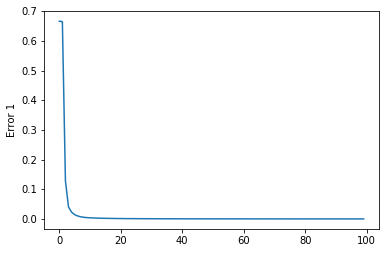

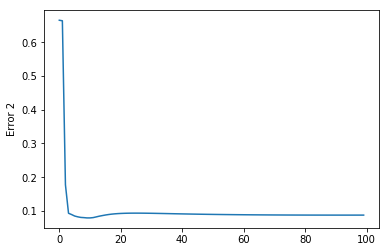

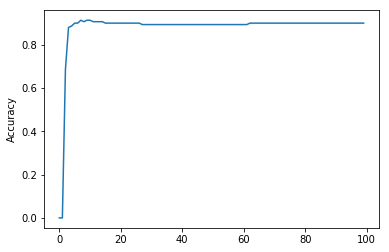

In [20]:
# PLOTTING THE GRAPH
plot(totalerror1, "Error 1")
plot(totalerror2, "Error 2")
plot(accuracy, "Accuracy")

TypeError: can't multiply sequence by non-int of type 'NoneType'